In [1]:

from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [18]:
!pip3 install umap-learn
!pip3 install datashader
import json
import datashader as ds
import datashader.transfer_functions as tf
import datashader.bundling as bd
import matplotlib.pyplot as plt
import colorcet
import matplotlib.colors
import matplotlib.cm
import bokeh.plotting as bpl
import bokeh.transform as btr
import holoviews as hv
import holoviews.operation.datashader as hd
from sklearn.datasets import fetch_openml
import numpy as np
import umap
import umap.plot
from umap.umap_ import nearest_neighbors
import pandas as pd    
from os import listdir,mkdir
from os.path import isfile, join,exists
import os
import numpy as np
import seaborn as sns
# from dtaidistance.dtw_visualisation import plot_warp,plot_warpingpaths
# from dtaidistance import dtw
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import make_pipeline


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


FileNotFoundError: ignored

In [2]:
final_folders2=['armraise','bicyclecrunch','birddog','curl','fly','legraise','overheadpress','pushup','squat','superman']
labels=['armraise','bicyclecrunch','birddog','curl','fly','legrais','overheadpress','pushup','squat','superman']
angle_finalPath='gdrive/MyDrive/EECE_5644_FINAL_PROJECT/data/train/angle'
positions_finalPath='gdrive/MyDrive/EECE_5644_FINAL_PROJECT/data/train/positions'
output_array_intialization=[0,0,0,0,0,0,0,0,0,0]
frame_size=1
drive_path='gdrive/MyDrive/EECE_5644_FINAL_PROJECT/data'
local_path='/Users/vikashmediboina/Documents/Exersises'
angle_rep_wise_data_path='angle_rep_wise_data_40_vedioes_each_set.xlsx'
postion_rep_wise_data_path='postion_rep_wise_data_40_vedioes_each_set.xlsx'
postion_data_path='postion_data_frame_size_100.xlsx'
angle_data_path='postion_data_frame_size_100.xlsx'

In [3]:
def generate_data(rep):
    mean_diff_data=np.array([])
    for key in rep:
#         print(rep[feuter_index])
        rep[key]=rep[key]-np.mean(rep[key])
    return rep

In [ ]:
var={}
pd_all_data=pd.DataFrame()
for path_index in range(0,len(final_folders2)):
#     path_index=0
    path=join(finalPath,final_folders2[path_index])
    print(path_index)
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f)) and f.endswith('.json')]
    for file_index in range(0,len(onlyfiles)):
                f = open(join(path,onlyfiles[file_index]))
                data = json.load(f)
                for i in range(0,len(data['reps'])):
                    pd_rep_pxels=pd.DataFrame.from_dict(data['reps'][i]['pixels'])


                    pd_rep_pxels=generate_data(pd_rep_pxels)
                    pd_after_var=pd_rep_pxels.var().transpose()
                    pd_after_var['label']=data['reps'][i]['label']
                    pd_after_var['frames']=len(data['reps'][i]['pixels']['left_hip_Y'])
                    pd_all_data = pd.concat([pd_all_data, pd_after_var], axis=1)
pd_all_data=pd_all_data.transpose()
pd_all_data=pd_all_data.reset_index()
pd_all_data.to_excel(join(finalPath,"varaince.xlsx"))
pd_all_data 

NameError: ignored

In [ ]:
pd_all_data=pd_all_data.reset_index()
pd_all_data

NameError: ignored

In [ ]:
pd_rep_all_angle_data=pd.read_excel(join(drive_path,angle_rep_wise_data_path))
pd_rep_all_data=pd_rep_all_angle_data.drop(['Unnamed: 0'],axis=1)
pd_rep_all_angle_data

FileNotFoundError: ignored

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [14]:
def Knn_variance(X_train,y_train,X_test,y_test):

  neighbors = np.arange(1, 9)
  train_accuracy = np.empty(len(neighbors))
  test_accuracy = np.empty(len(neighbors))
    
  # Loop over K values
  for i, k in enumerate(neighbors):
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train, y_train)
        
      # Compute training and test data accuracy
      train_accuracy[i] = knn.score(X_train, y_train)
      test_accuracy[i] = knn.score(X_test, y_test)
      y_pred=knn.predict(X_test)
      print("Accuracy======>> ",metrics.accuracy_score(y_test, y_pred))
      cf_matrix = confusion_matrix(y_test, y_pred)
      plt.figure(figsize=(15,10))
      
      ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

      ax.set_xlabel('\nPredicted Category')
      ax.set_ylabel('Actual Category ');

      ## Ticket labels - List must be in alphabetical order
      ax.xaxis.set_ticklabels(labels)
      ax.yaxis.set_ticklabels(labels)

      ## Display the visualization of the Confusion Matrix.
      plt.show()
  # Generate plot
  plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
  plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
    
  plt.legend()
  plt.xlabel('n_neighbors')
  plt.ylabel('Accuracy')
  plt.show()


In [15]:
def Dession_tree(X_train,y_train,X_test,y_test):

  plt.figure(figsize=(20,15),dpi=500)
  dession_clf = DecisionTreeClassifier()

  # Train Decision Tree Classifer
  dession_clf = dession_clf.fit(X_train,y_train)

  #Predict the response for test dataset
  dession_y_pred = dession_clf.predict(X_test)
  cf_matrix = confusion_matrix(y_test, dession_y_pred)
  plt.figure(figsize=(15,10))
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

  ax.set_xlabel('\nPredicted Category')
  ax.set_ylabel('Actual Category ');
  ax.xaxis.set_ticklabels(labels)
  
  ax.yaxis.set_ticklabels(labels)
  plt.show()
  plt.figure(figsize=(50,50),dpi=200)
  _ = tree.plot_tree(dession_clf, 
                   feature_names=X_train.keys(),  
                   class_names=np.unique(y_train),
                   filled=True)
      ## Display the visualization of the Confusion Matrix.
  plt.show()
  plt.figure(figsize=(20,20),dpi=200)
  _ = tree.plot_tree(dession_clf, 
                   feature_names=X_train.keys(),  
                   class_names=np.unique(y_train),
                   max_depth=2,
                   filled=True)
      ## Display the visualization of the Confusion Matrix.
  plt.show()
  print("Accuracy======>> ",metrics.accuracy_score(y_test, dession_y_pred))

In [16]:
def Plot_umap(x,y,n_neighbors=15):
  pipe = make_pipeline(PowerTransformer())
  X = pipe.fit_transform(x.copy())

  # Encode the target to numeric
  y_encoded = pd.factorize(y.flatten())[0]


  manifold = umap.UMAP(n_neighbors=n_neighbors).fit(X, y_encoded)
  umap.plot.points(manifold, labels=y.flatten());

# Angle grouping by repetition



In [17]:
pd_rep_all_angle_data=pd.read_excel(join(drive_path,angle_data_path))
pd_rep_all_angle_data=pd_rep_all_angle_data.drop(['Unnamed: 0'],axis=1)

FileNotFoundError: ignored

##Angle Group By Repetition


In [ ]:
x=pd_rep_all_angle_data.drop(['vedio_id'],axis=1).groupby('rep_id').var().fillna(0)
y=pd_rep_all_angle_data[['label','rep_id']].groupby('rep_id').agg(pd.Series.mode).to_numpy()
X_train, X_test, y_train, y_test = train_test_split( x, y.reshape(y.shape[0]), test_size=0.2, random_state=15)
pd_rep_all_angle_data

NameError: ignored

###============================================================================================



### **DECISION TREE REPETITION**

<Figure size 10000x7500 with 0 Axes>

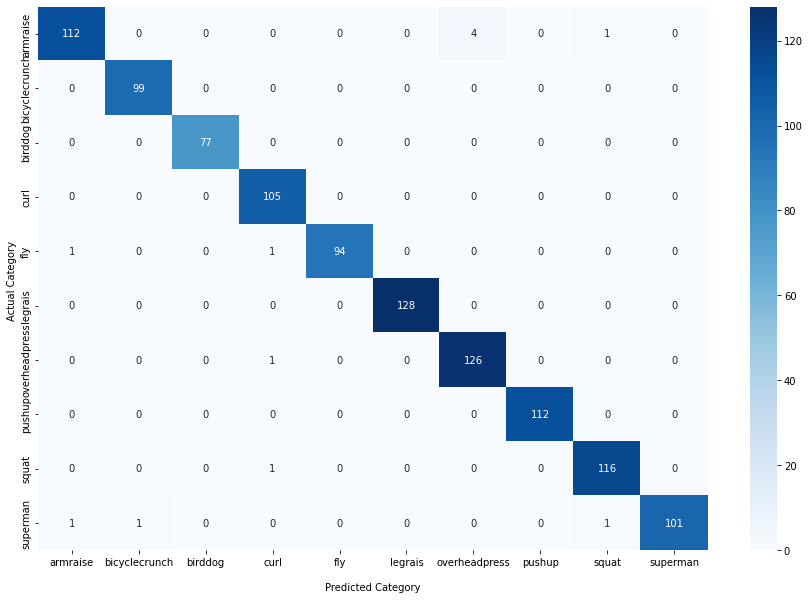

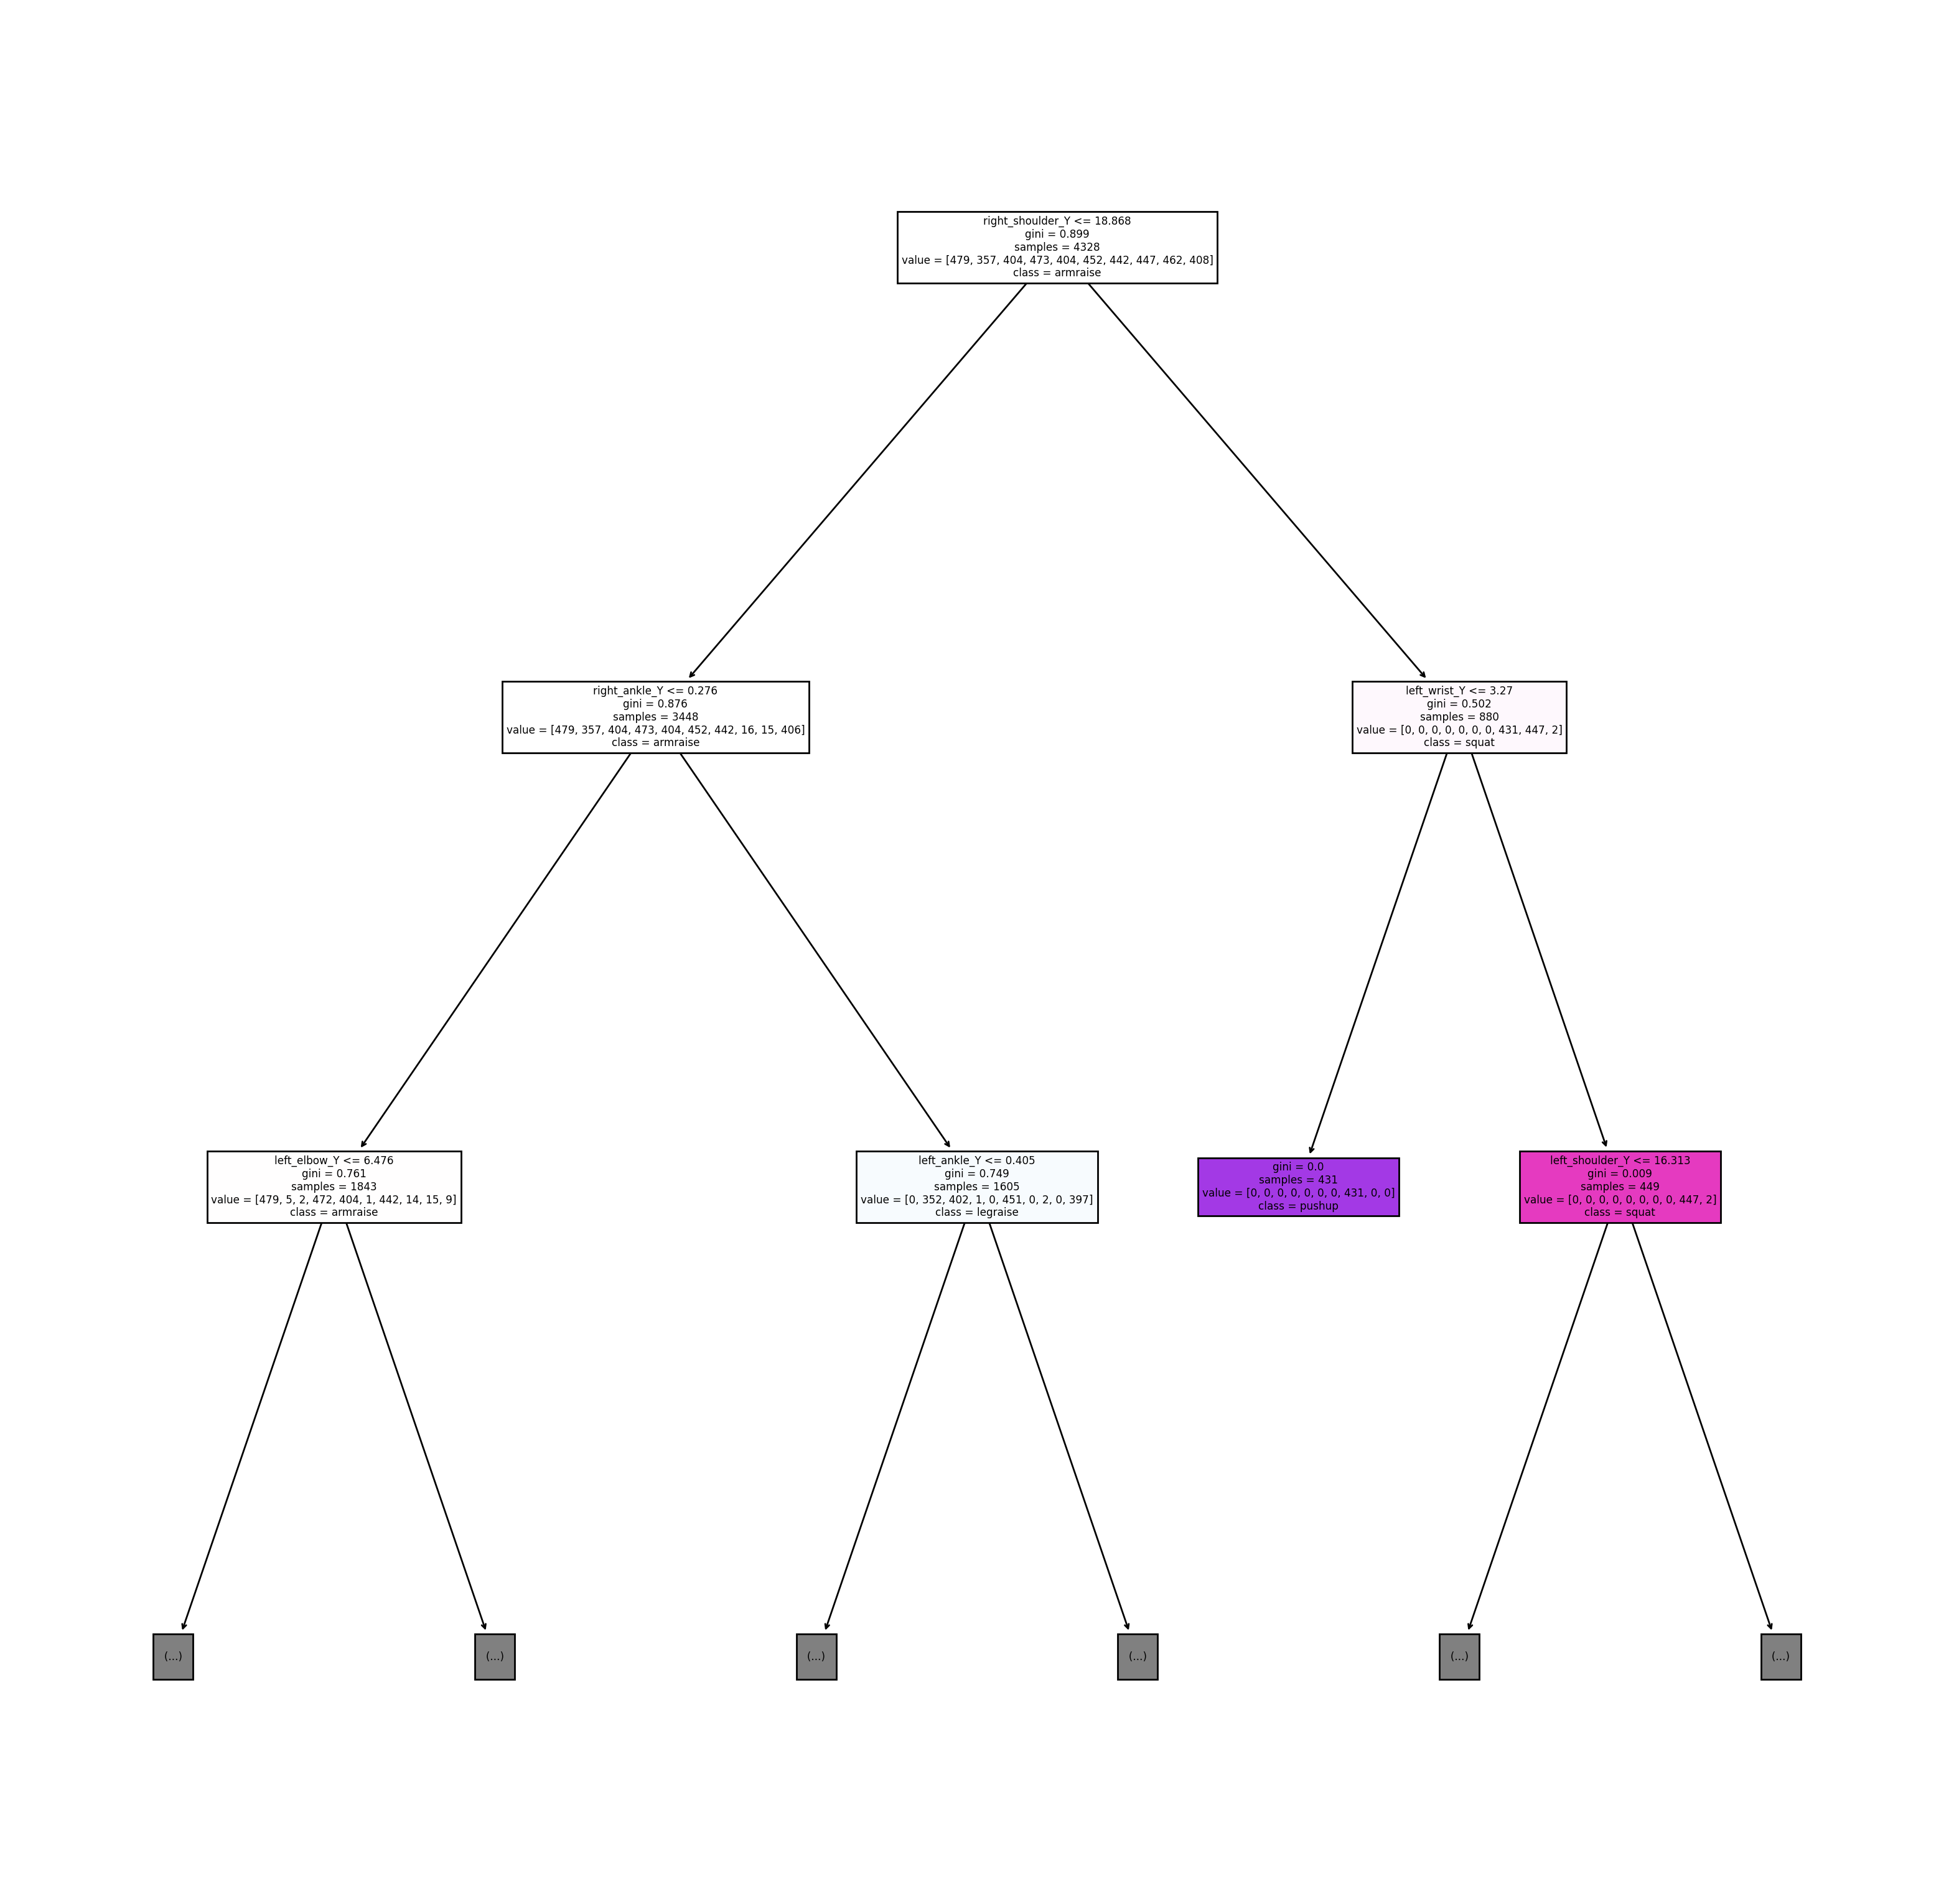

Accuracy======>>  0.988909426987061


In [ ]:
Dession_tree(X_train,y_train,X_test,y_test)

### **KNN.   Repetition Angle**

Accuracy======>>  0.9833641404805915


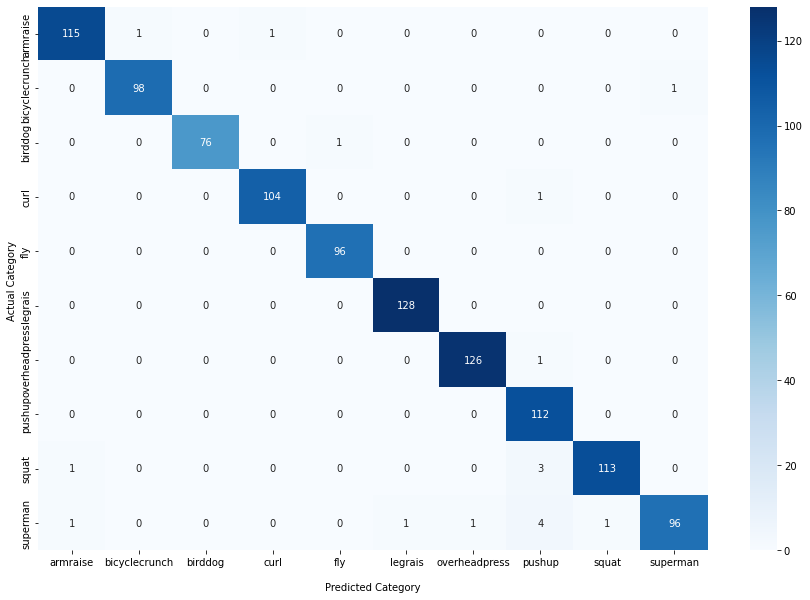

Accuracy======>>  0.9824399260628466


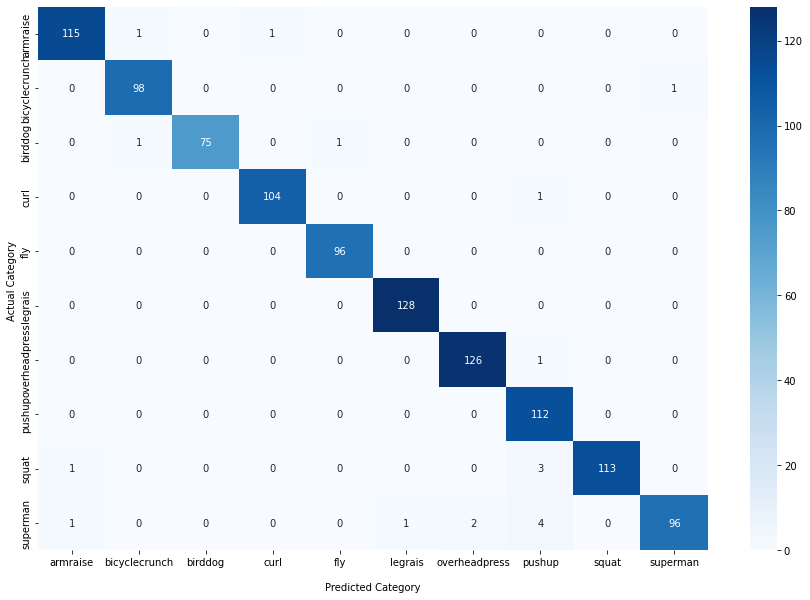

Accuracy======>>  0.9842883548983364


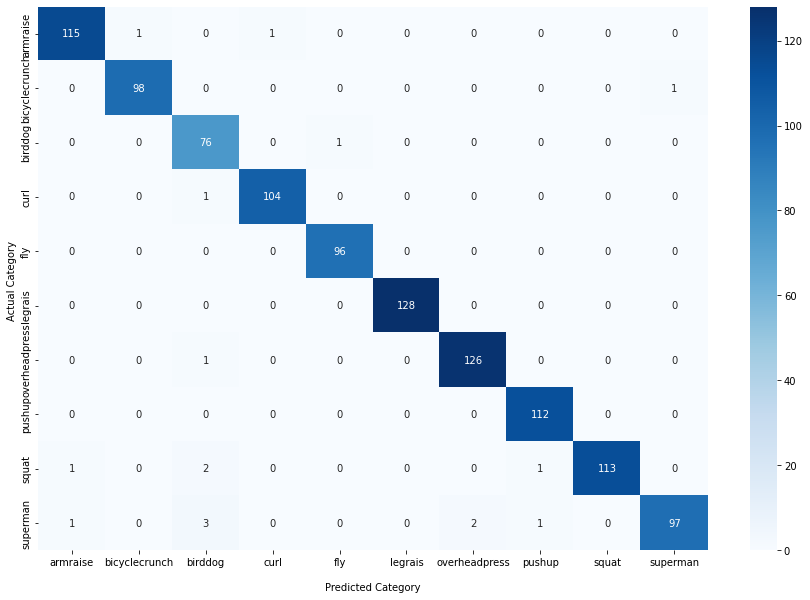

Accuracy======>>  0.9861367837338263


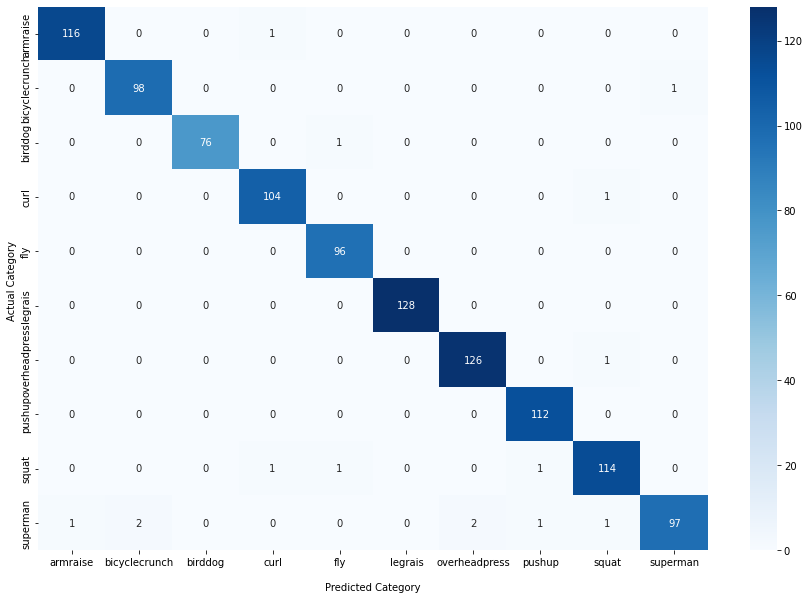

Accuracy======>>  0.9861367837338263


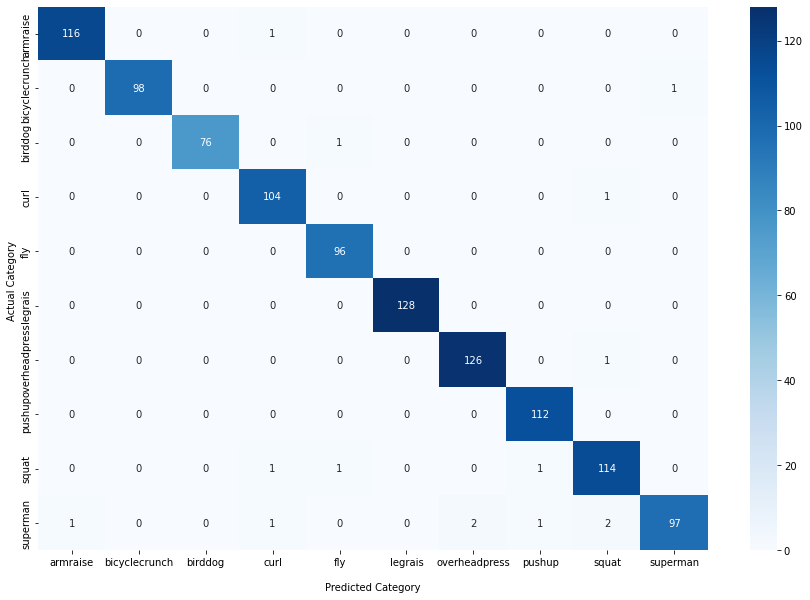

Accuracy======>>  0.9833641404805915


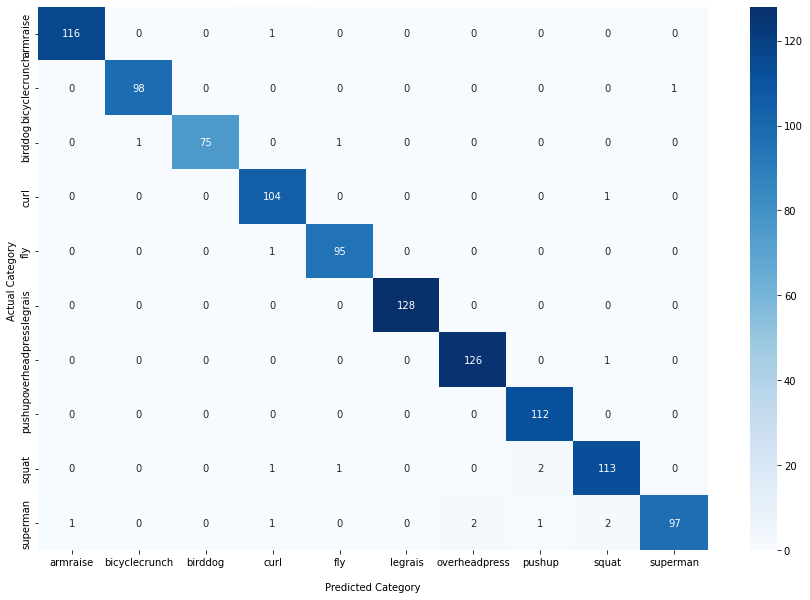

Accuracy======>>  0.9833641404805915


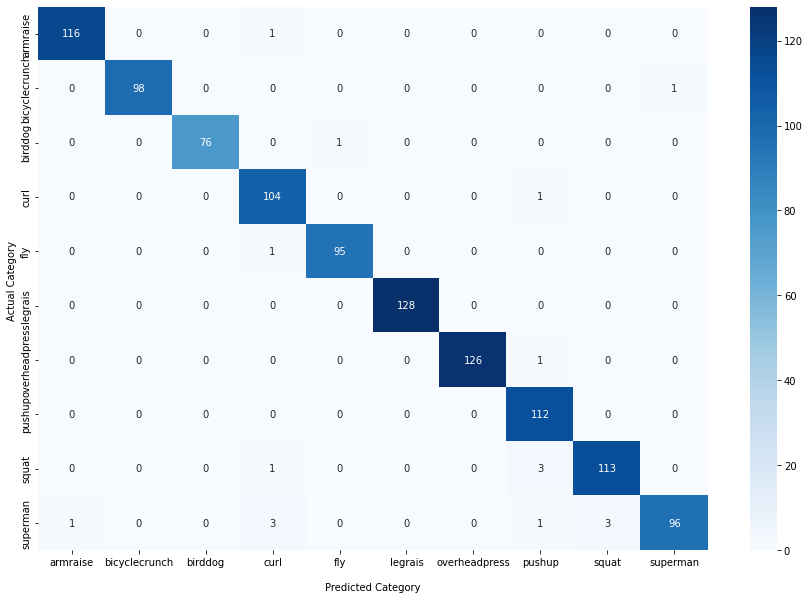

Accuracy======>>  0.9833641404805915


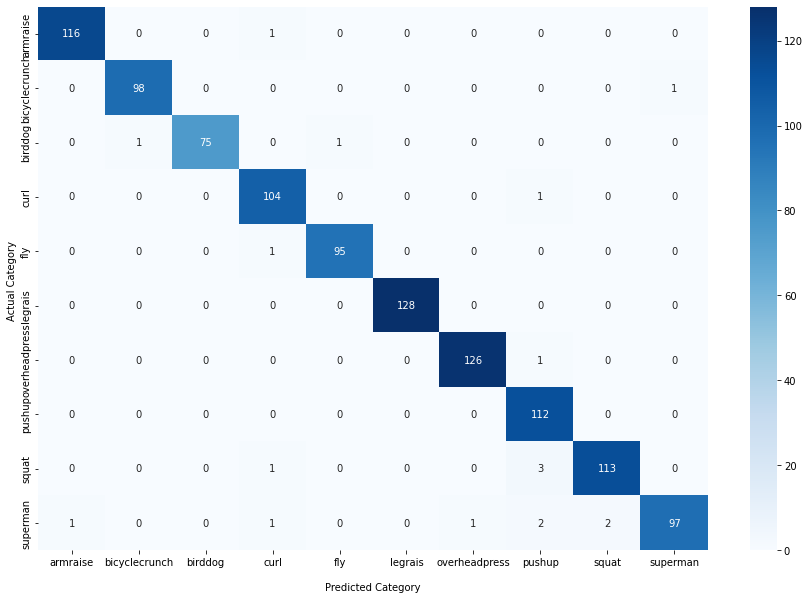

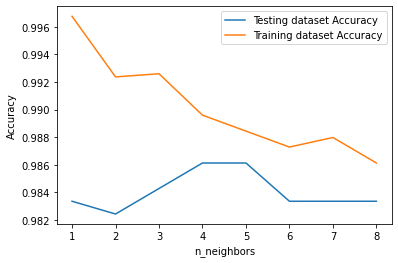

In [ ]:
Knn_variance(X_train,y_train,X_test,y_test)

UMAP

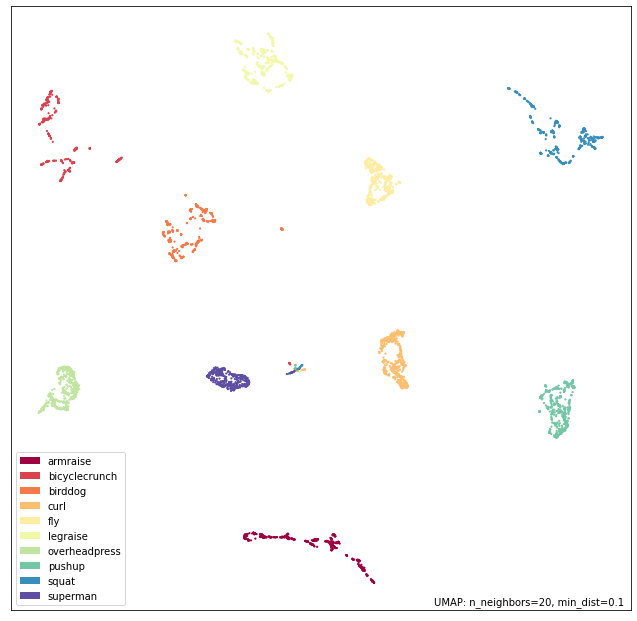

In [ ]:
Plot_umap(x,y,n_neighbors=20)

###============================================================================================



## *Angle Group by Video*


In [11]:
x=pd_rep_all_angle_data.drop(['rep_id'],axis=1).groupby('vedio_id').var().fillna(0)
y=pd_rep_all_angle_data[['label','vedio_id']].groupby('vedio_id').agg(pd.Series.mode).to_numpy()
X_train, X_test, y_train, y_test = train_test_split( x, y.reshape(y.shape[0]), test_size=0.2, random_state=15)

NameError: ignored

### **DECISION TREE**

<Figure size 10000x7500 with 0 Axes>

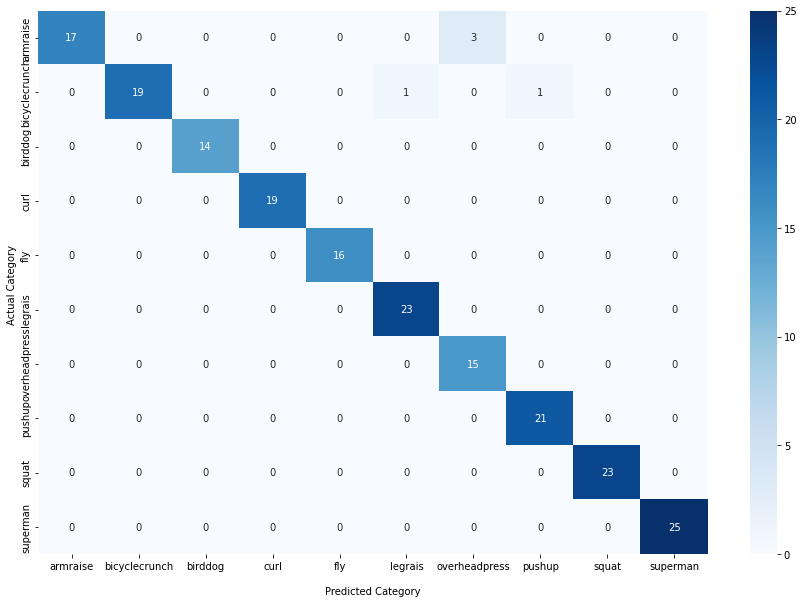

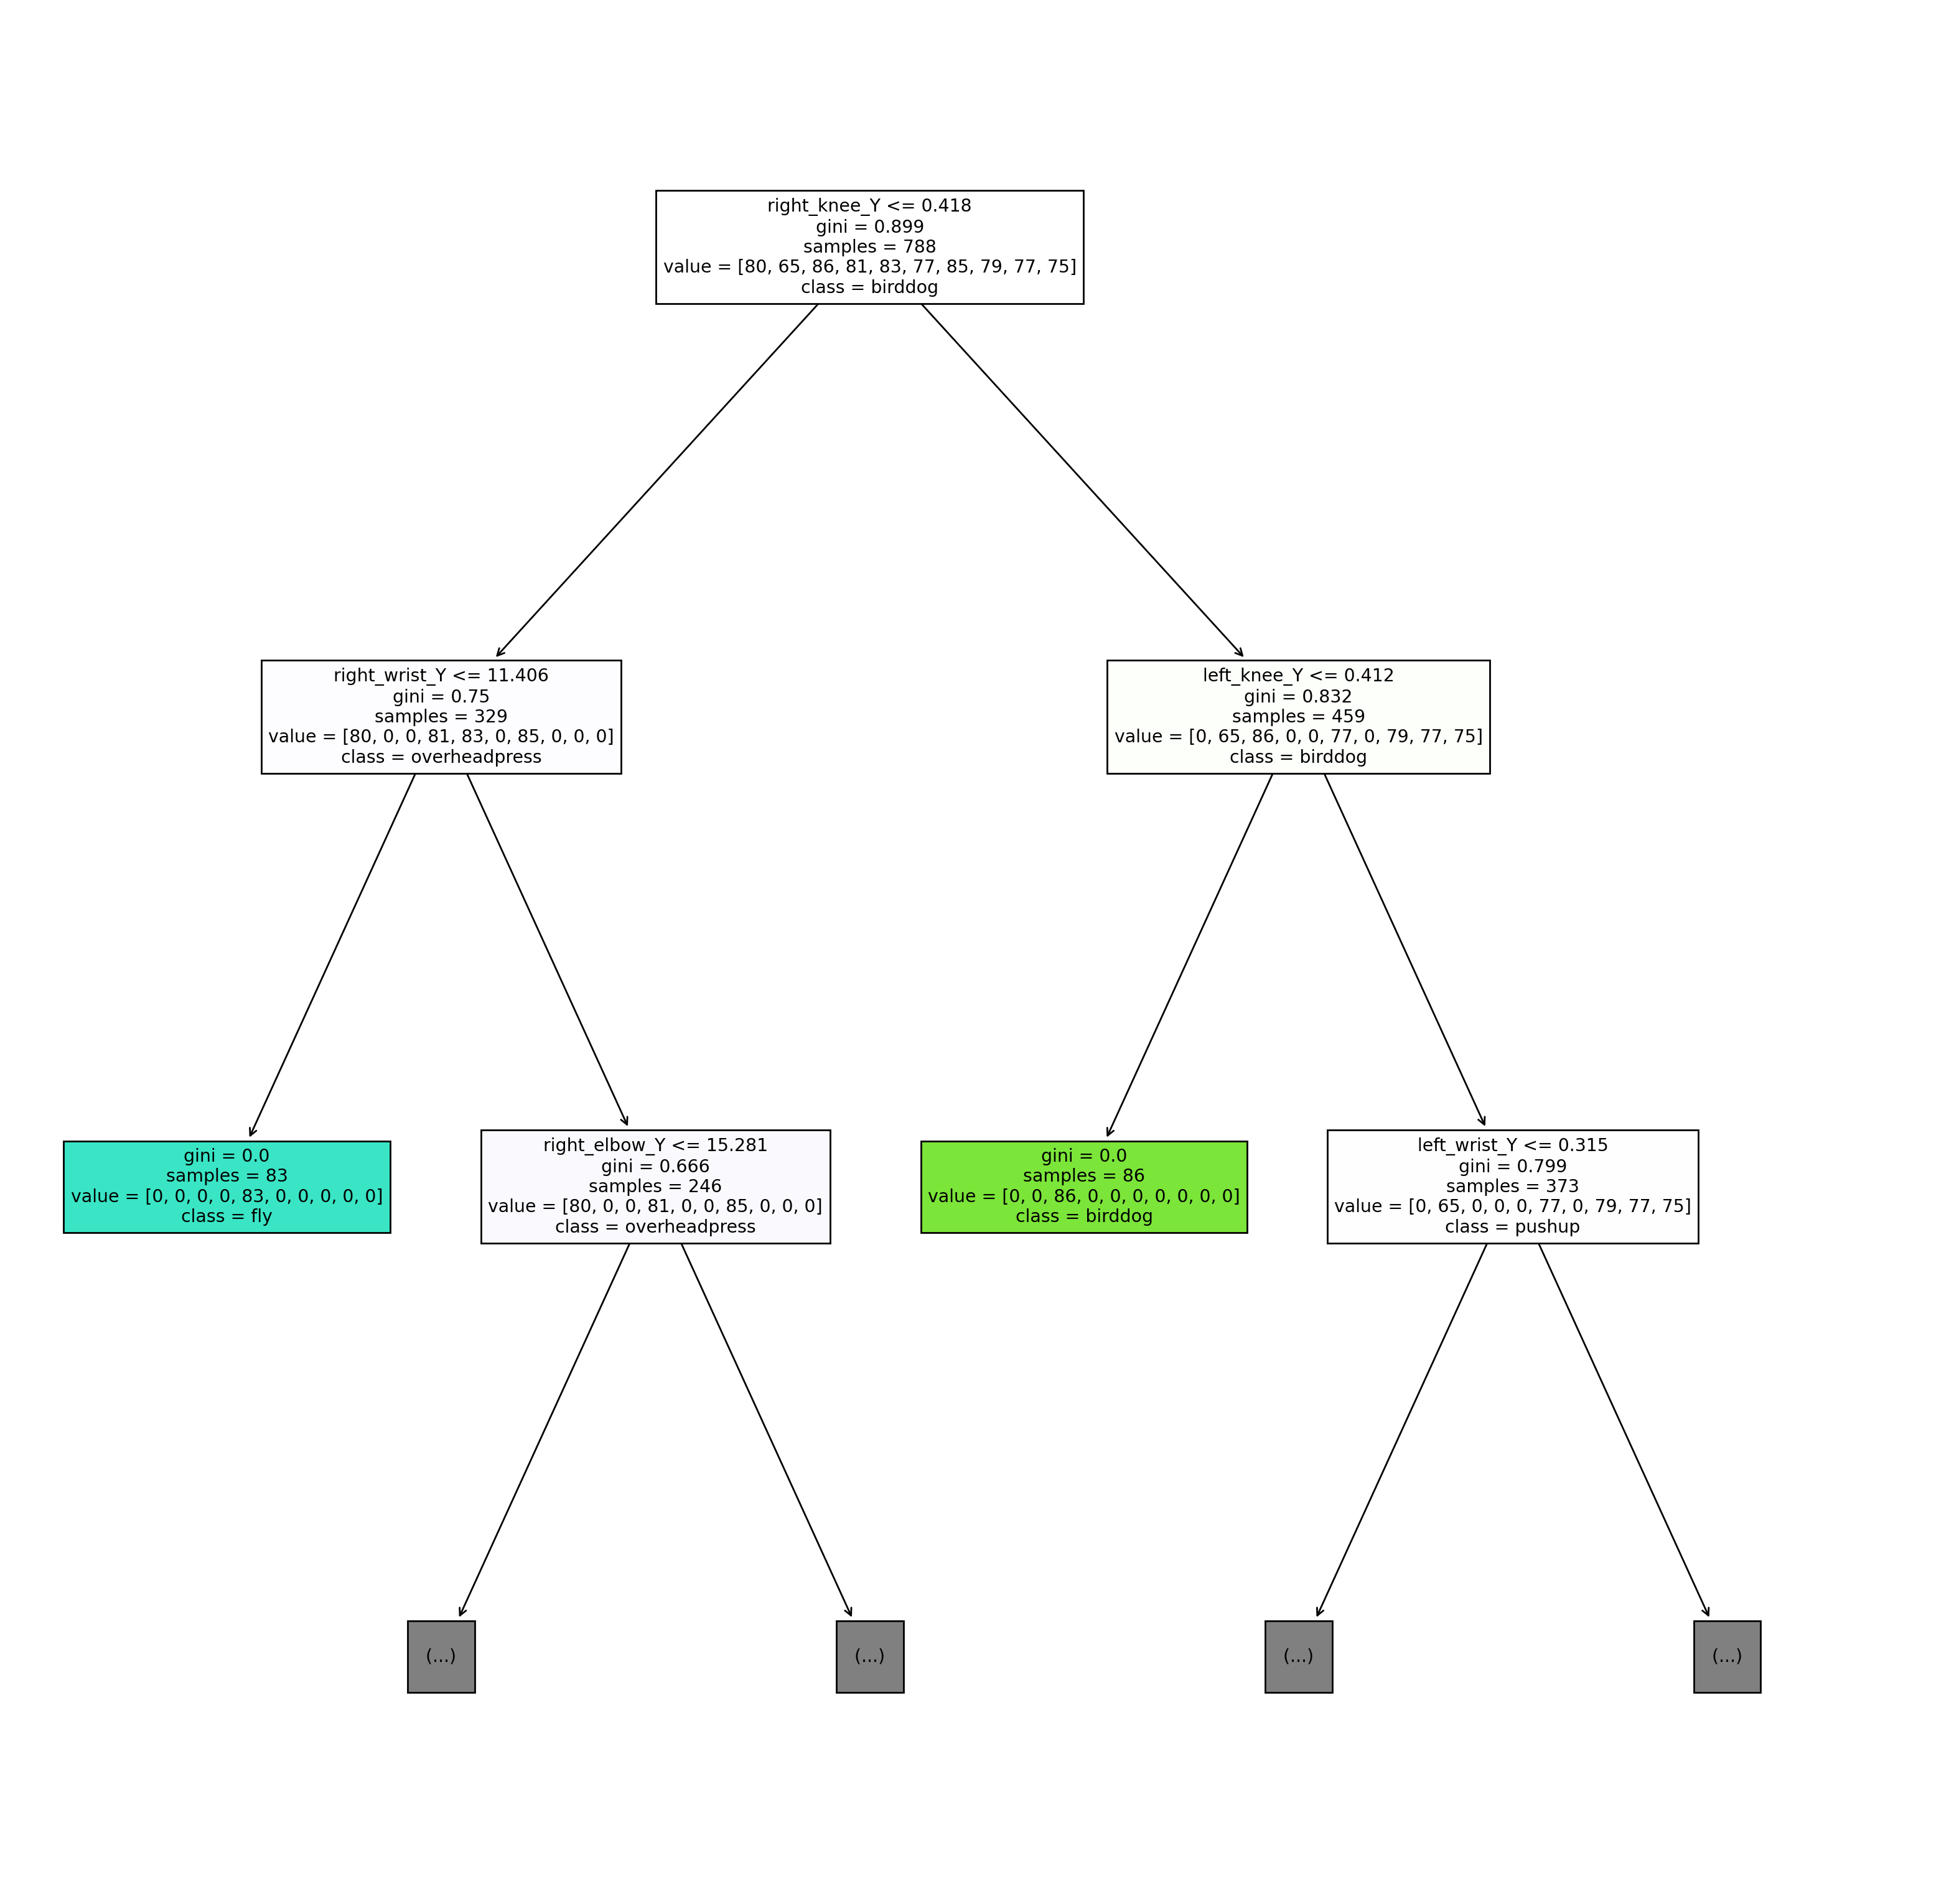

Accuracy======>>  0.9746192893401016


In [ ]:
Dession_tree(X_train,y_train,X_test,y_test)

###KNN

Accuracy======>>  0.9746192893401016


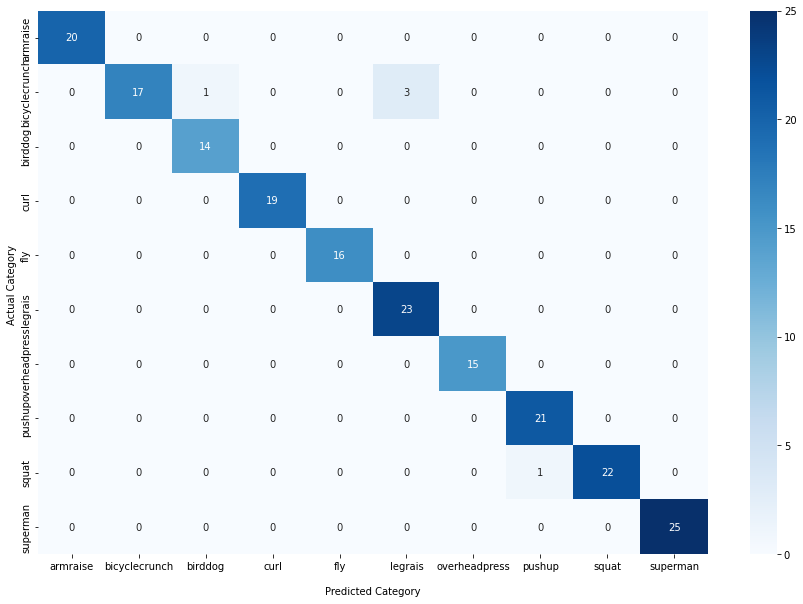

Accuracy======>>  0.9593908629441624


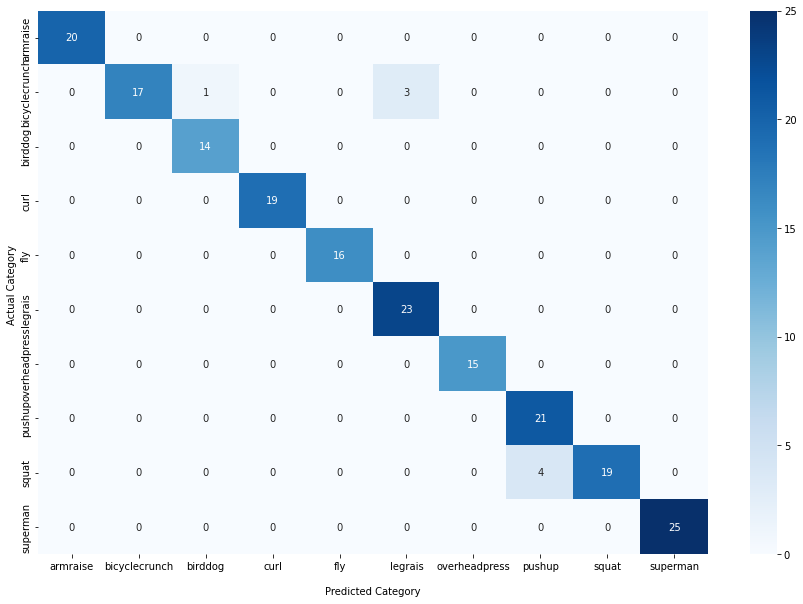

Accuracy======>>  0.9644670050761421


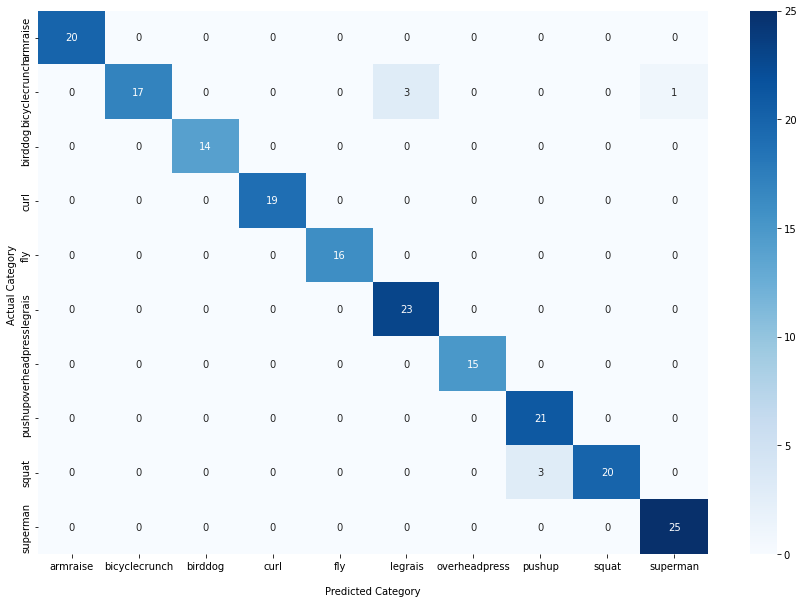

Accuracy======>>  0.9543147208121827


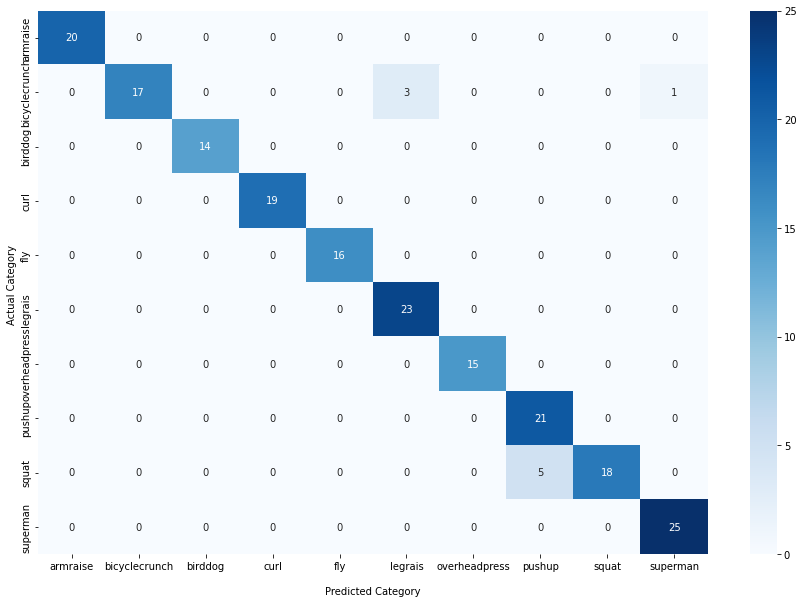

Accuracy======>>  0.9543147208121827


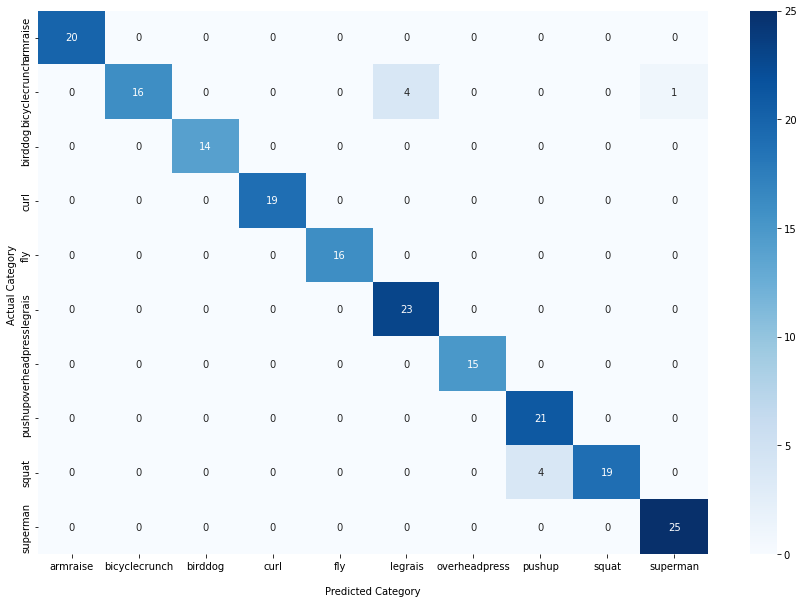

Accuracy======>>  0.9441624365482234


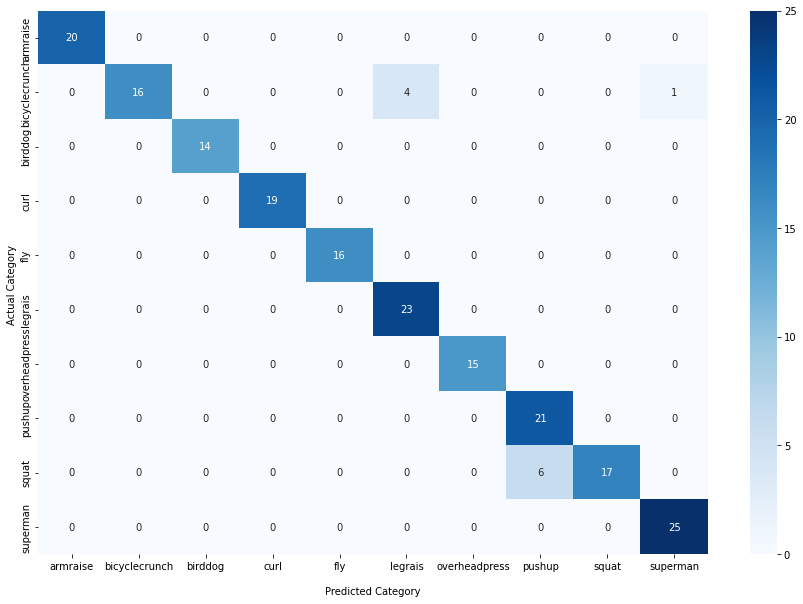

Accuracy======>>  0.9441624365482234


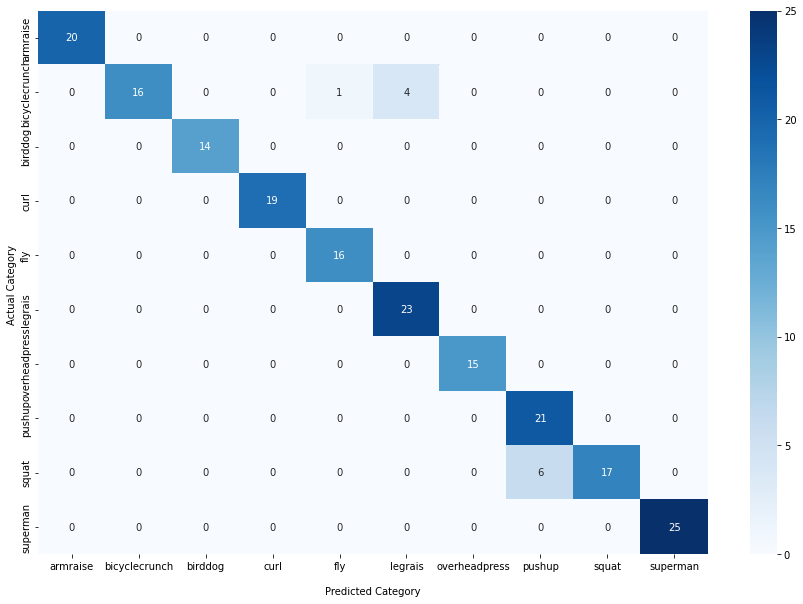

Accuracy======>>  0.9390862944162437


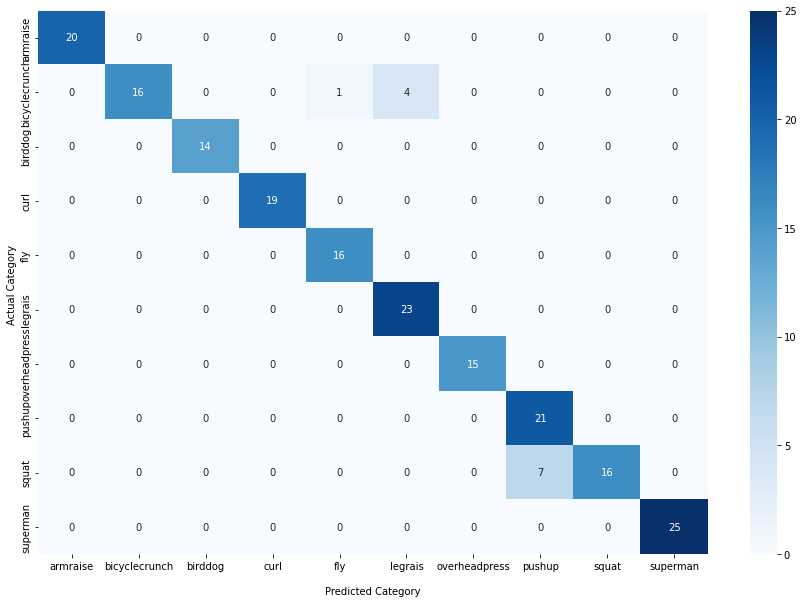

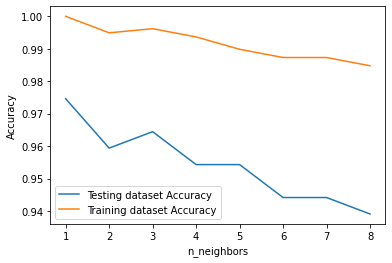

In [ ]:
Knn_variance(X_train,y_train,X_test,y_test)

UMAP

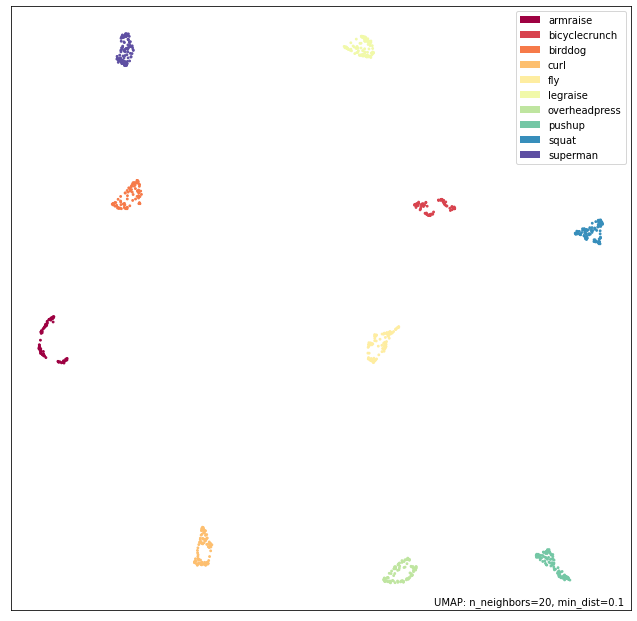

In [ ]:
Plot_umap(x,y,n_neighbors=20)

###============================================================================================



#Position Data Grouping Apply


In [ ]:
pd_rep_all_position_data=pd.read_excel(join(drive_path,postion_data_path))
pd_rep_all_position_data=pd_rep_all_position_data.drop(['Unnamed: 0'],axis=1)

In [ ]:
pd_rep_all_position_data

left_hip_X  left_hip_Y  left_knee_X  left_knee_Y  left_ankle_X  \
0              0.0    0.000000     0.000000     0.000000      0.000000   
1              0.0    0.000000     0.000000     0.000000      0.000000   
2              0.0    0.000000     0.000000     0.000000      0.000000   
3              0.0    0.000000     0.000000     0.000000      0.000000   
4              0.0    0.000000     0.000000     0.000000      0.000000   
...            ...         ...          ...          ...           ...   
237795         0.0    0.102564    -0.153846     0.192308      0.730769   
237796         0.0    0.102564    -0.153846     0.192308      0.730769   
237797         0.0    0.102564    -0.153846     0.192308      0.730769   
237798         0.0    0.102564    -0.153846     0.192308      0.730769   
237799         0.0    0.102564    -0.153846     0.192308      0.730769   

        left_ankle_Y  right_hip_X  right_hip_Y  right_knee_X  right_knee_Y  \
0           0.000000     0.139535     0.000000      0.000000      0.000000   
1           0.000000     0.139535     0.000000      0.000000      0.000000   
2           0.000000     0.139535     0.000000      0.000000      0.000000   
3           0.000000     0.139535     0.000000      0.000000      0.000000   
4           0.000000     0.139535     0.000000      0.000000      0.000000   
...              ...          ...          ...           ...           ...   
237795      3.448718     0.000000    -0.730769      1.025641      0.730769   
237796      3.448718     0.000000    -0.730769      1.025641      1.730769   
237797      3.448718     0.000000    -0.730769      1.025641      1.730769   
237798      3.448718     0.000000    -0.730769      1.025641      1.730769   
237799      3.448718     0.000000    -0.730769      1.025641      1.730769   

        ...  left_wrist_Y  right_shoulder_X  right_shoulder_Y  right_elbow_X  \
0       ...     25.744186          0.883721          0.976744      -4.581395   
1       ...     25.744186          0.883721          0.976744      -4.581395   
2       ...     23.744186          0.883721          0.976744      -2.581395   
3       ...     18.744186          0.883721          0.976744      -0.581395   
4       ...      9.744186          0.883721         -0.023256       2.418605   
...     ...           ...               ...               ...            ...   
237795  ...      3.602564         -0.320513          0.884615      -0.217949   
237796  ...      3.602564         -0.320513          1.884615      -0.217949   
237797  ...      3.602564         -0.320513          1.884615      -0.217949   
237798  ...      3.602564         -0.320513          1.884615      -0.217949   
237799  ...      4.602564         -0.320513          1.884615      -0.217949   

        right_elbow_Y  right_wrist_X  right_wrist_Y  rep_id     label  \
0           12.488372     -12.232558      23.418605       1  armraise   
1           12.488372     -11.232558      23.418605       1  armraise   
2           11.488372      -8.232558      22.418605       1  armraise   
3            9.488372      -2.232558      18.418605       1  armraise   
4            5.488372       3.767442       9.418605       1  armraise   
...               ...            ...            ...     ...       ...   
237795       3.307692      -0.910256       4.692308    6203  superman   
237796       3.307692      -0.910256       4.692308    6203  superman   
237797       3.307692      -0.910256       5.692308    6203  superman   
237798       3.307692      -0.910256       5.692308    6203  superman   
237799       3.307692      -0.910256       5.692308    6203  superman   

        vedio_id  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
237795      1000  
237796      1000  
237797      1000  
237798      1000  
237799      1000  

[237800 rows x 31 columns]

## **POSITION GROUP BY REPETITION**



In [ ]:
x=pd_rep_all_position_data.drop(['vedio_id'],axis=1).groupby('rep_id').var().fillna(0)
y=pd_rep_all_position_data[['label','rep_id']].groupby('rep_id').agg(pd.Series.mode).to_numpy()
X_train, X_test, y_train, y_test = train_test_split( x, y.reshape(y.shape[0]), test_size=0.2, random_state=15)


# DECISION TREE REPETITION

<Figure size 10000x7500 with 0 Axes>

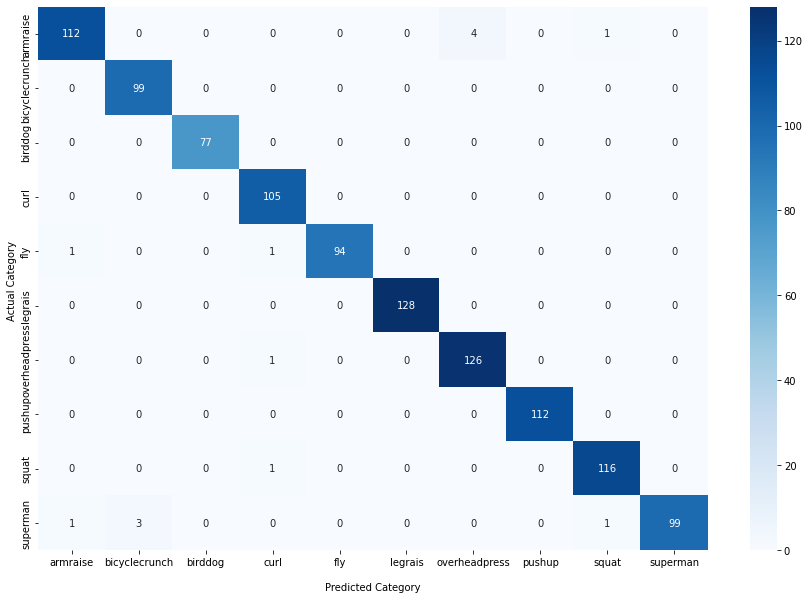

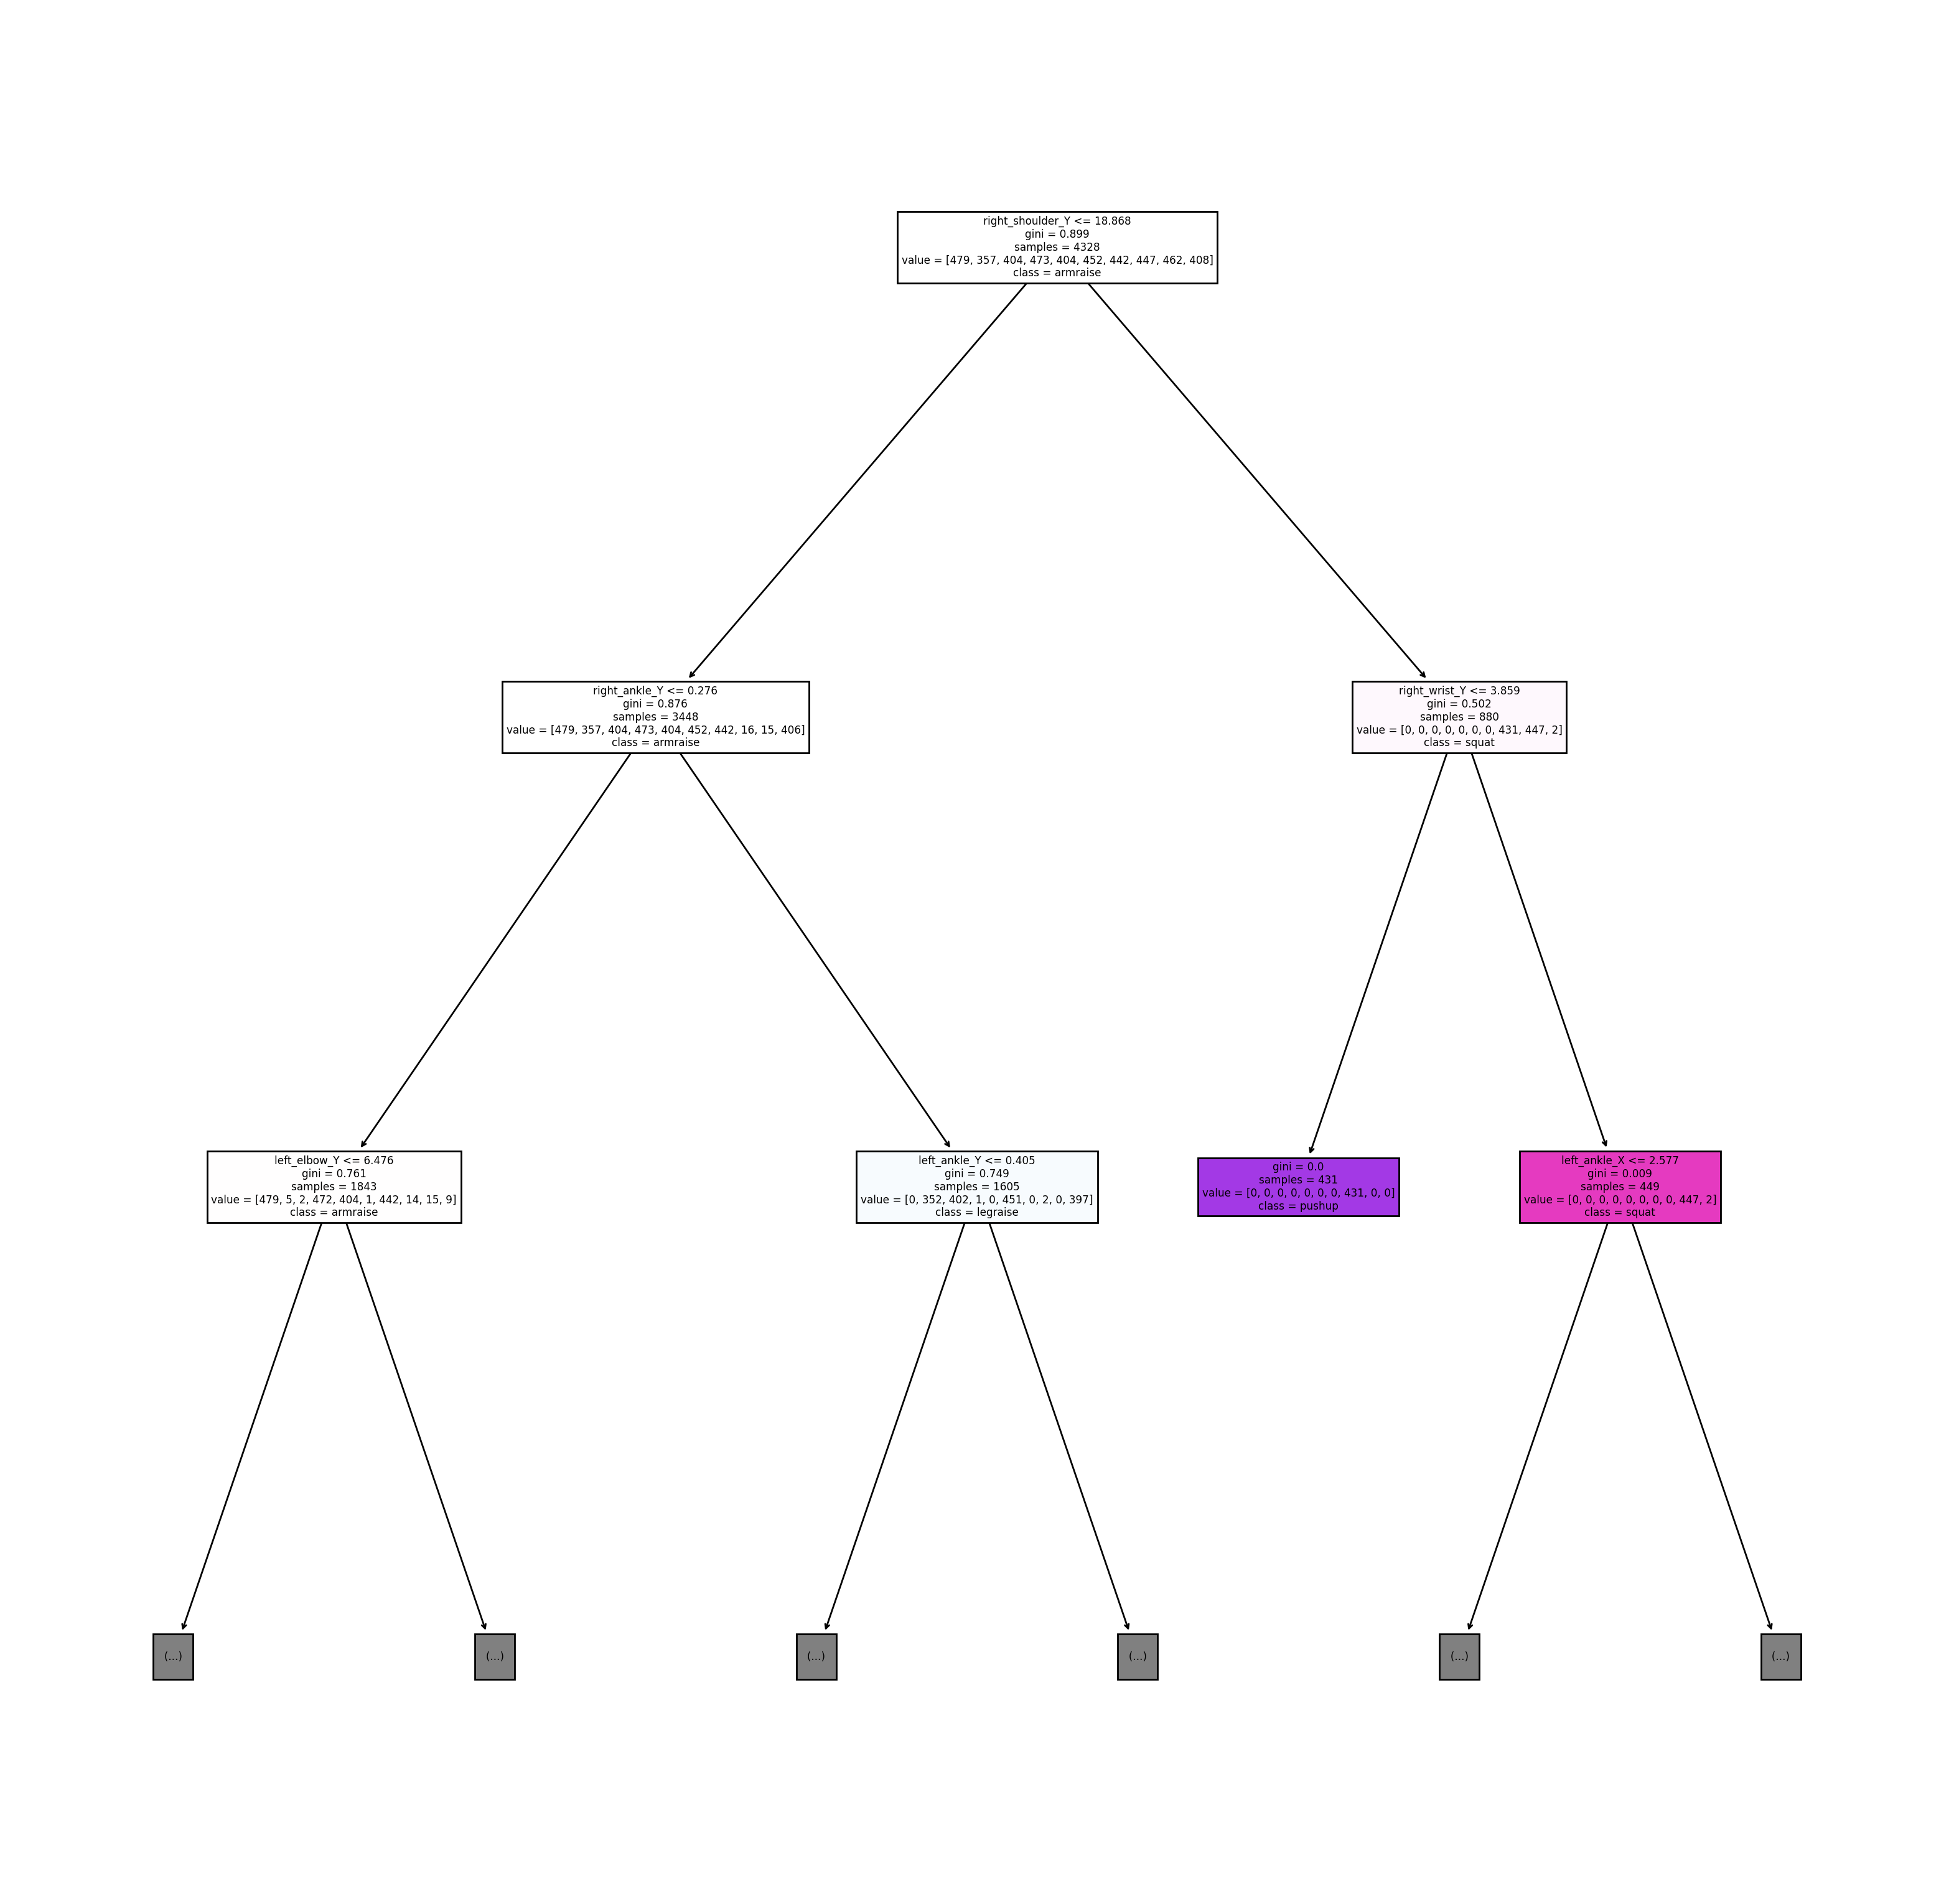

Accuracy======>>  0.9870609981515711


In [ ]:
Dession_tree(X_train,y_train,X_test,y_test)

# KNN Repetition 

Accuracy======>>  0.9833641404805915


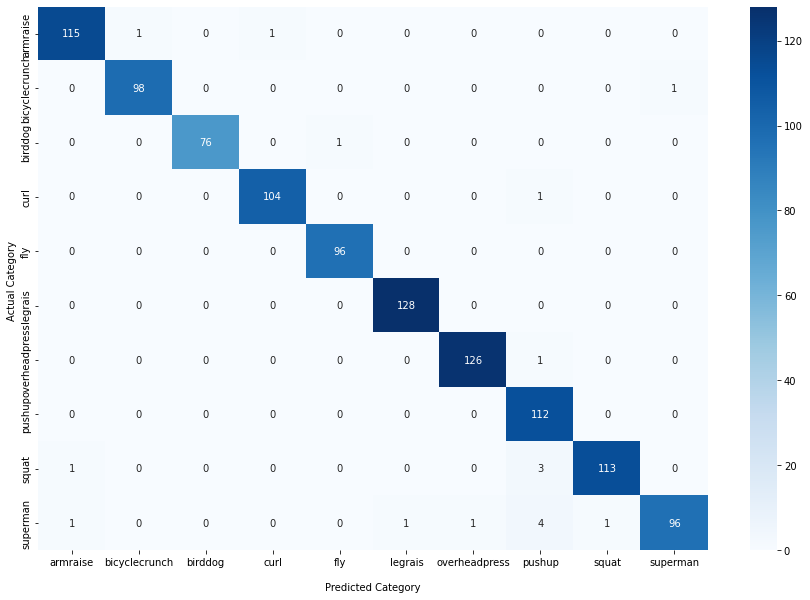

Accuracy======>>  0.9824399260628466


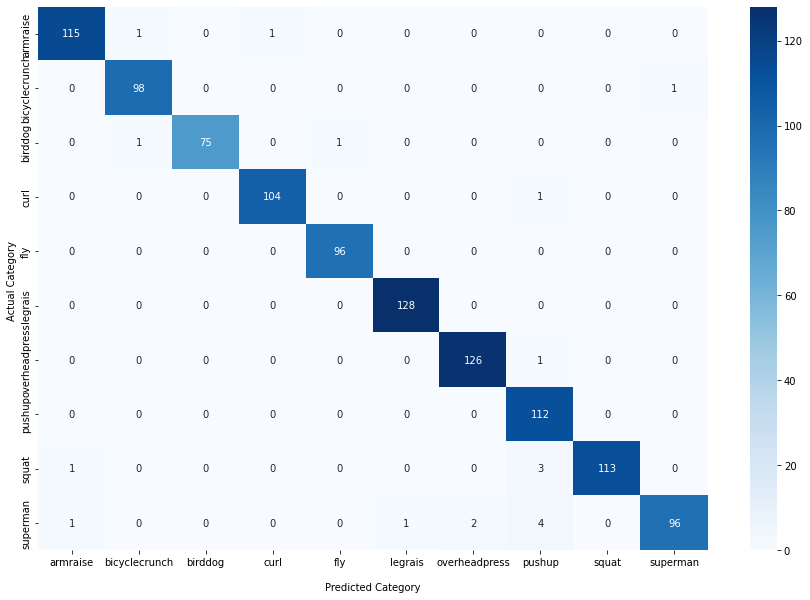

Accuracy======>>  0.9842883548983364


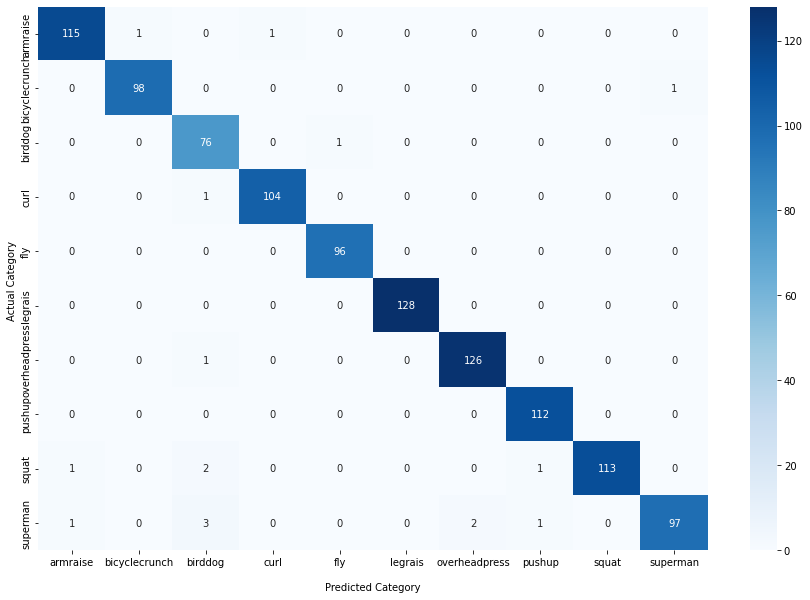

Accuracy======>>  0.9861367837338263


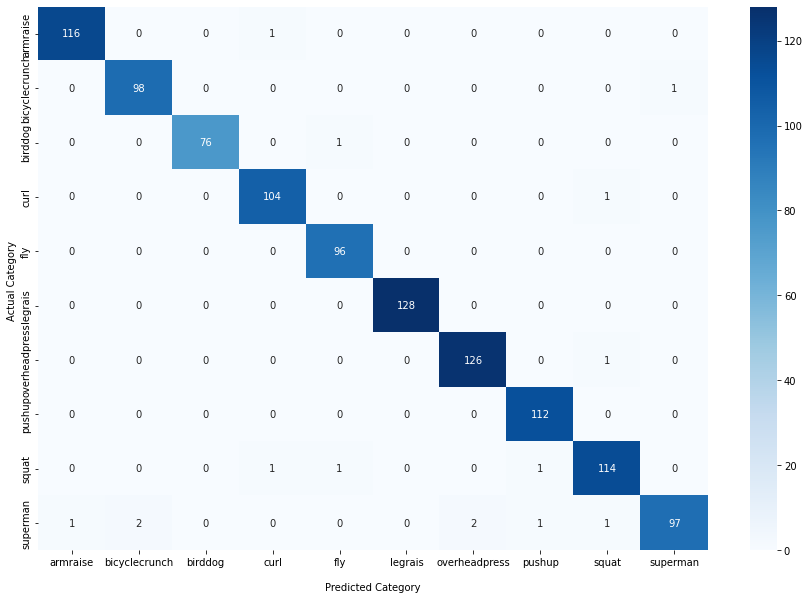

Accuracy======>>  0.9861367837338263


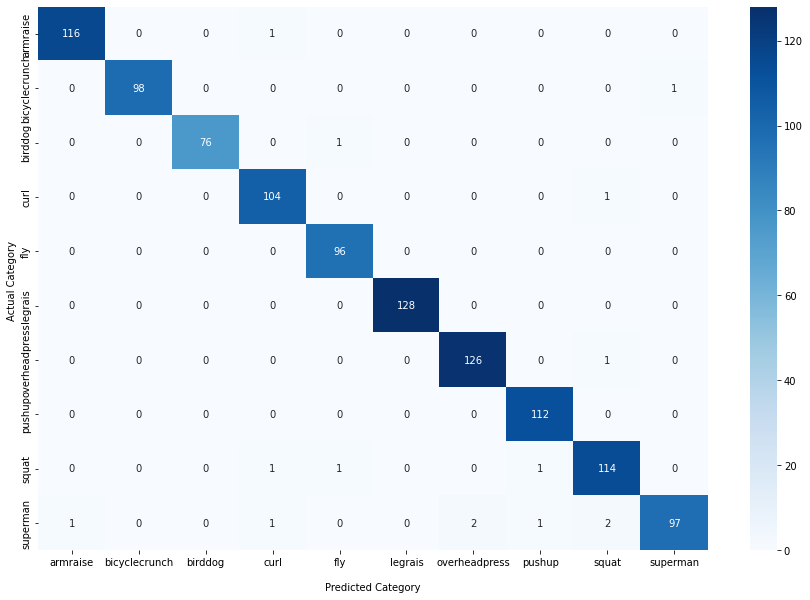

Accuracy======>>  0.9833641404805915


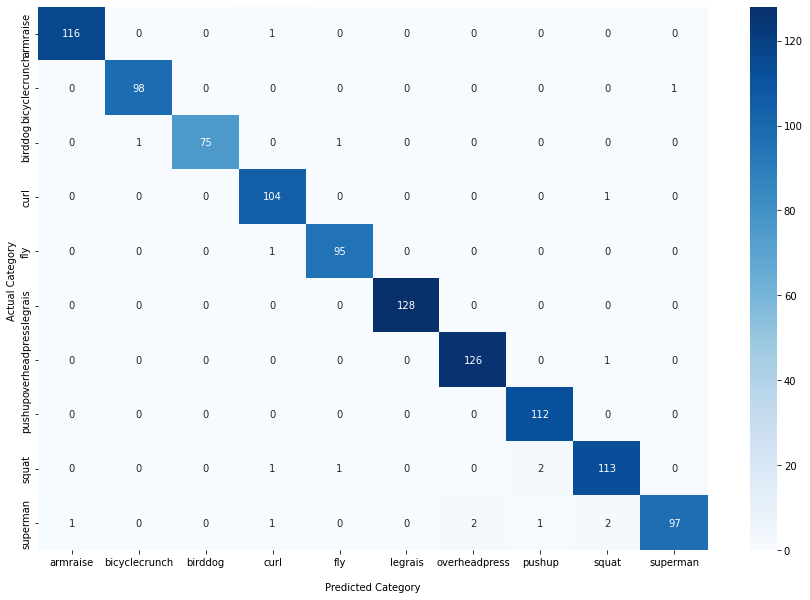

Accuracy======>>  0.9833641404805915


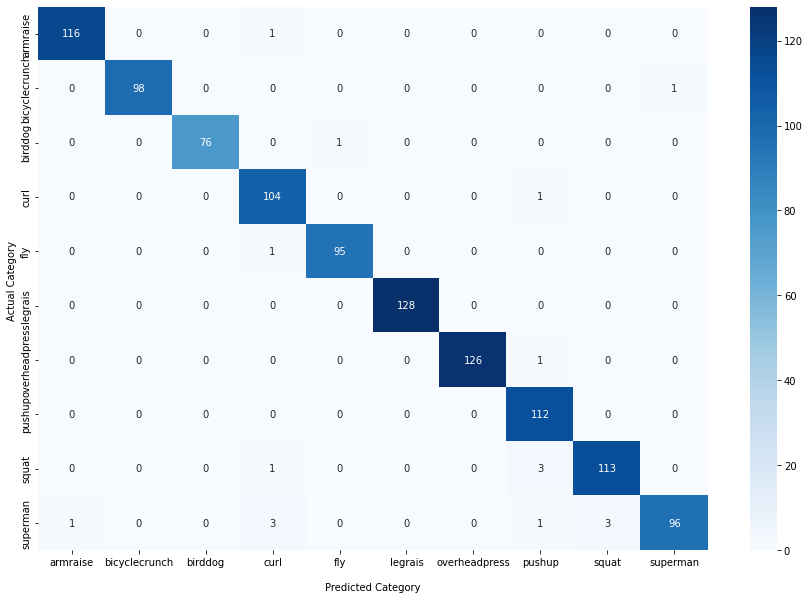

Accuracy======>>  0.9833641404805915


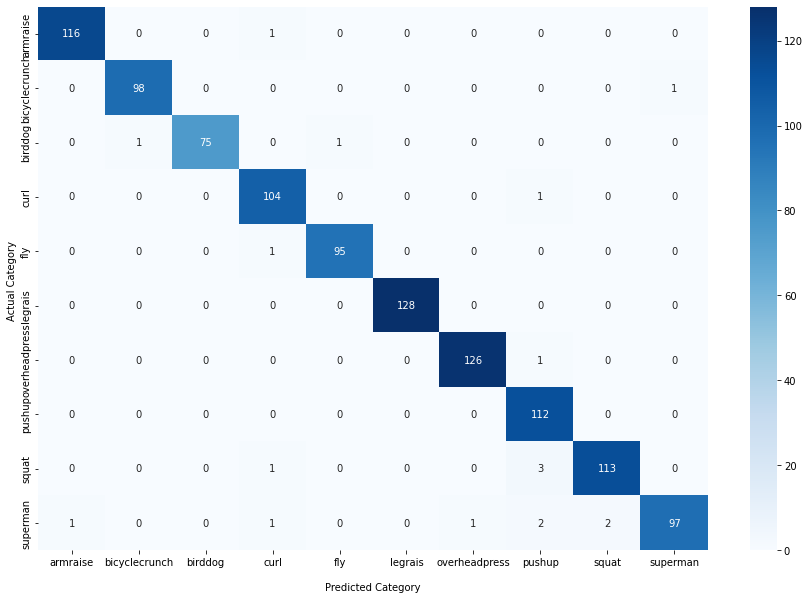

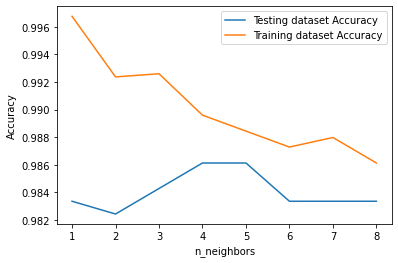

In [ ]:
Knn_variance(X_train,y_train,X_test,y_test)

#KNN WITH UMAP

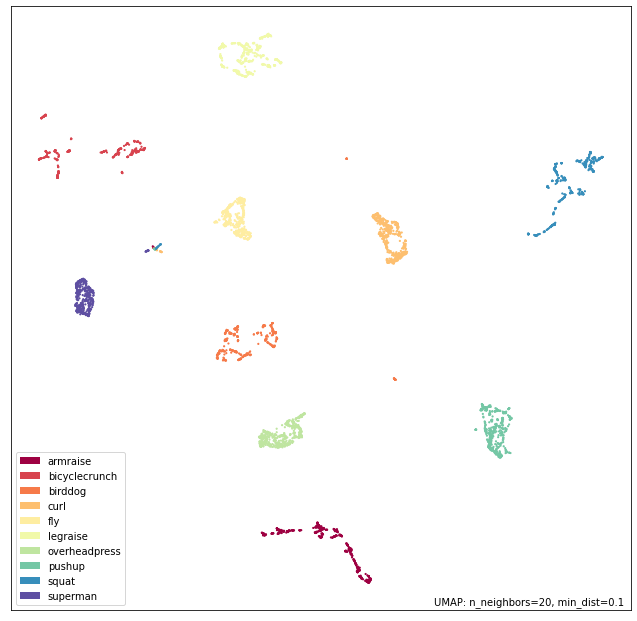

In [ ]:
Plot_umap(x,y,n_neighbors=20)

# Position Group By Video

In [ ]:
x=pd_rep_all_position_data.drop(['rep_id'],axis=1).groupby('vedio_id').var().fillna(0)
y=pd_rep_all_position_data[['label','vedio_id']].groupby('vedio_id').agg(pd.Series.mode).to_numpy()
X_train, X_test, y_train, y_test = train_test_split( x, y.reshape(y.shape[0]), test_size=0.2, random_state=15)

# DECISION TREE

In [ ]:
Dession_tree(X_train,y_train,X_test,y_test)

NameError: ignored

# KNN

Accuracy======>>  0.9746192893401016


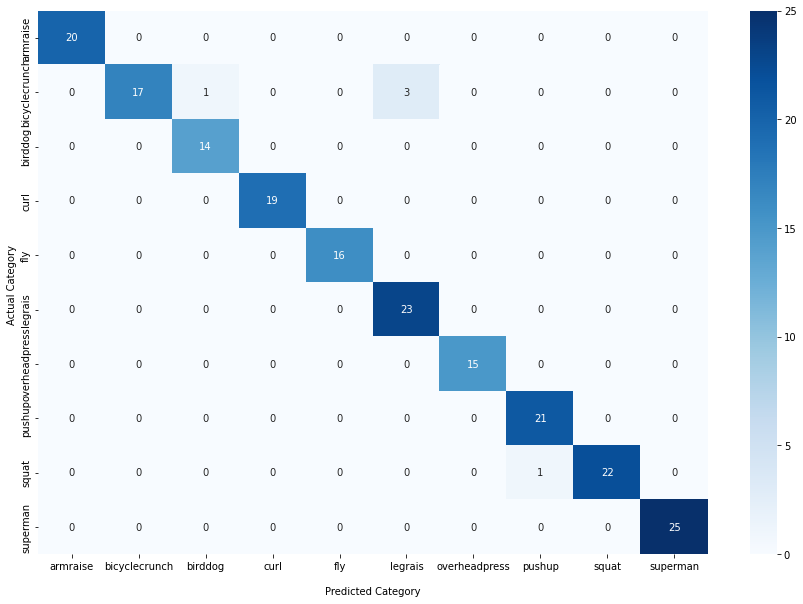

Accuracy======>>  0.9593908629441624


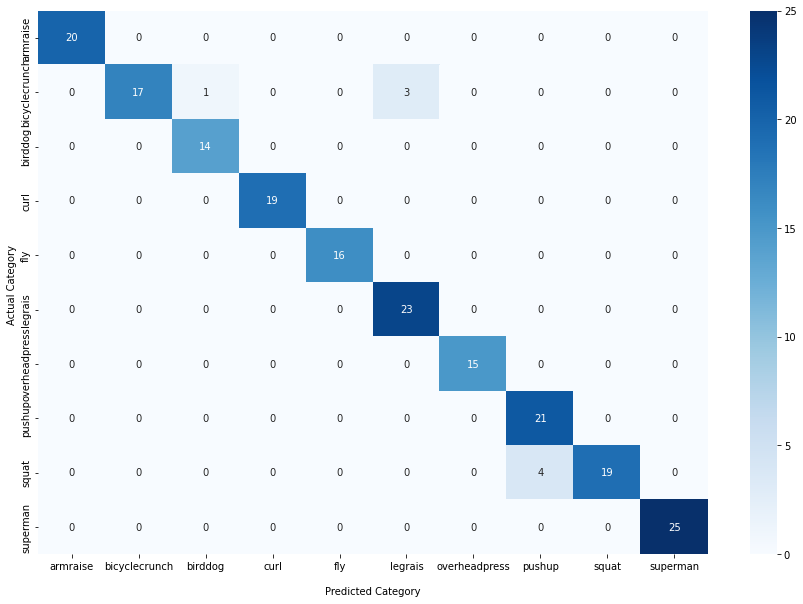

Accuracy======>>  0.9644670050761421


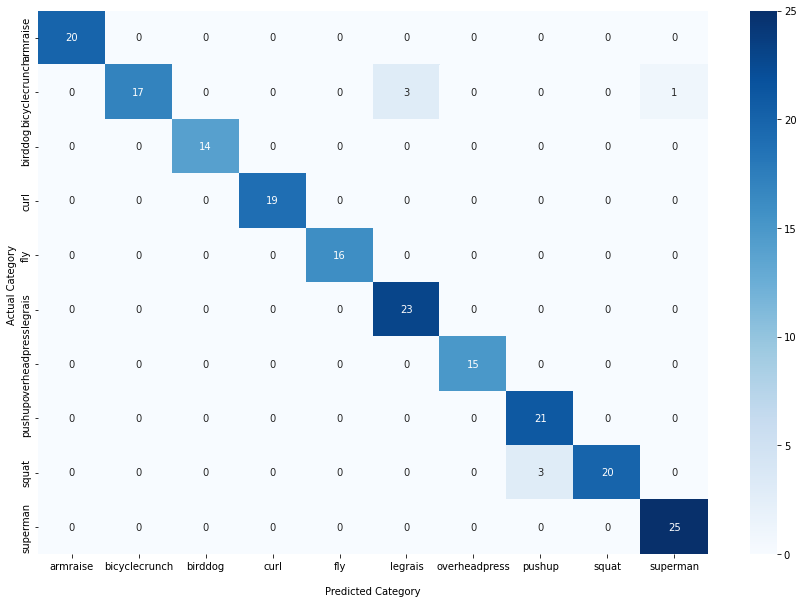

Accuracy======>>  0.9543147208121827


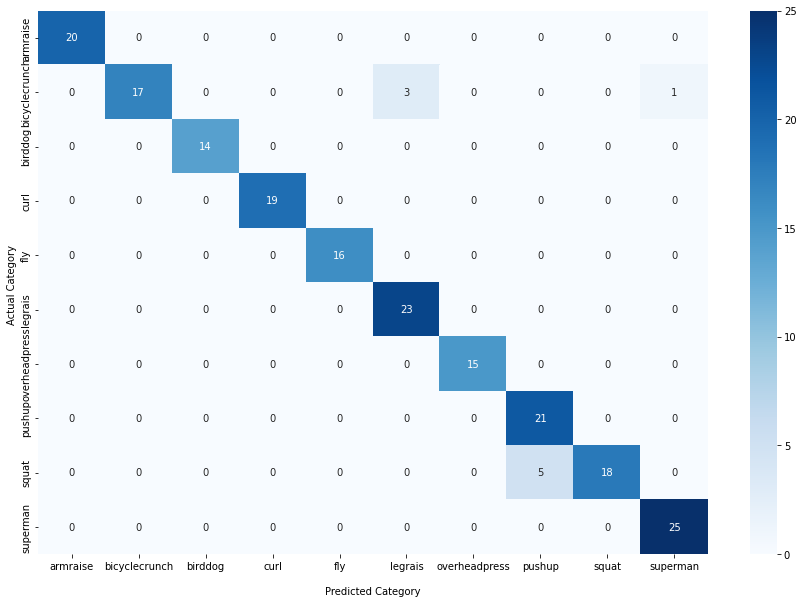

Accuracy======>>  0.9543147208121827


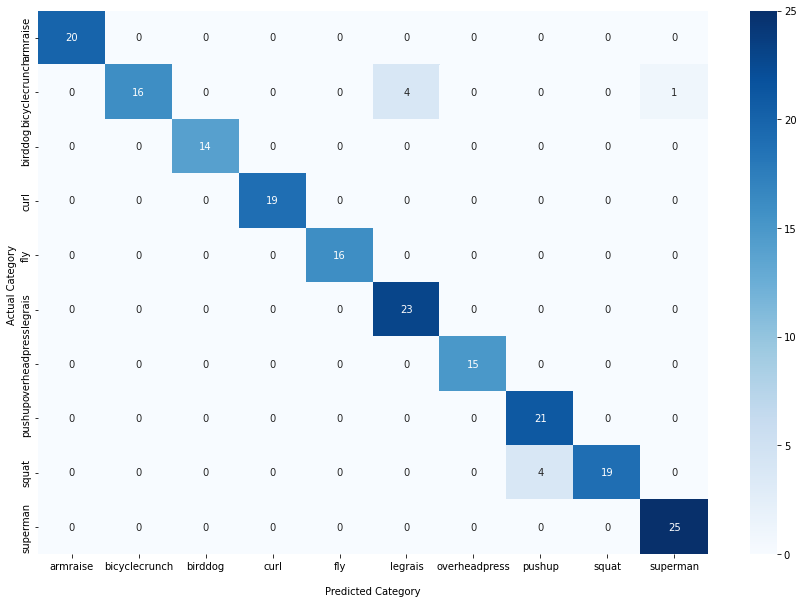

Accuracy======>>  0.9441624365482234


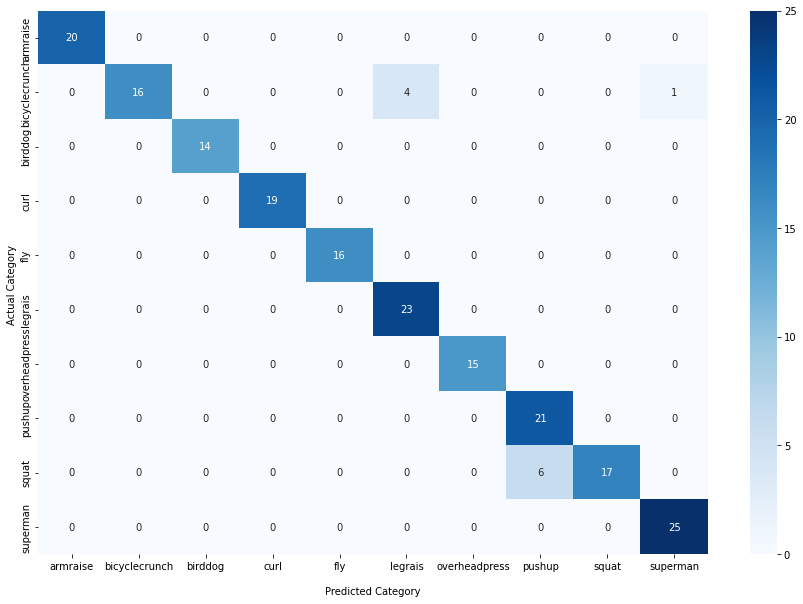

Accuracy======>>  0.9441624365482234


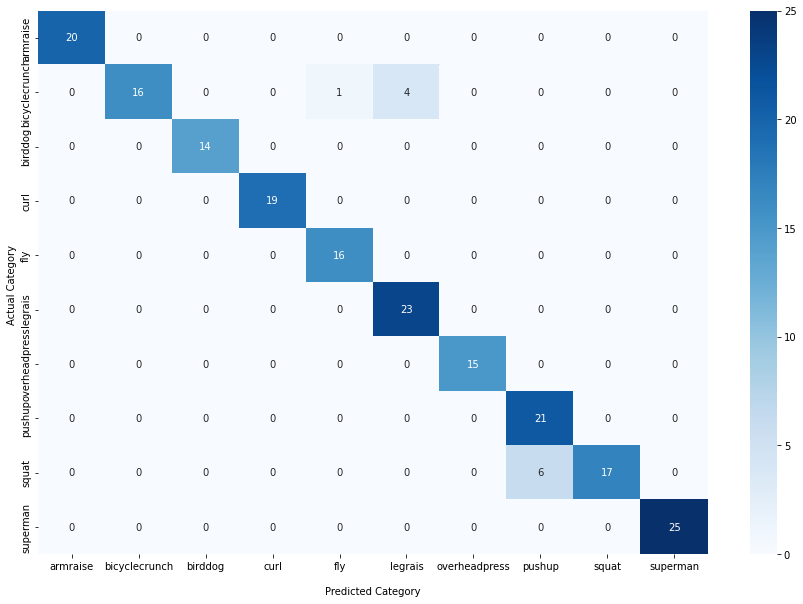

Accuracy======>>  0.9390862944162437


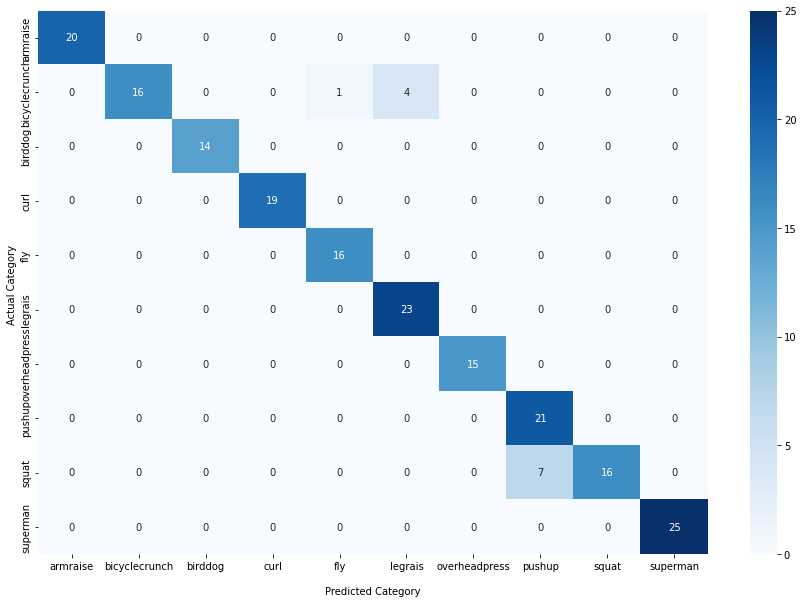

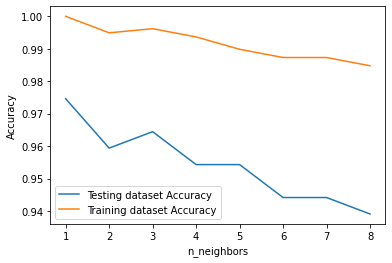

In [ ]:
Knn_variance(X_train,y_train,X_test,y_test)

#KNN WITH UMAP 


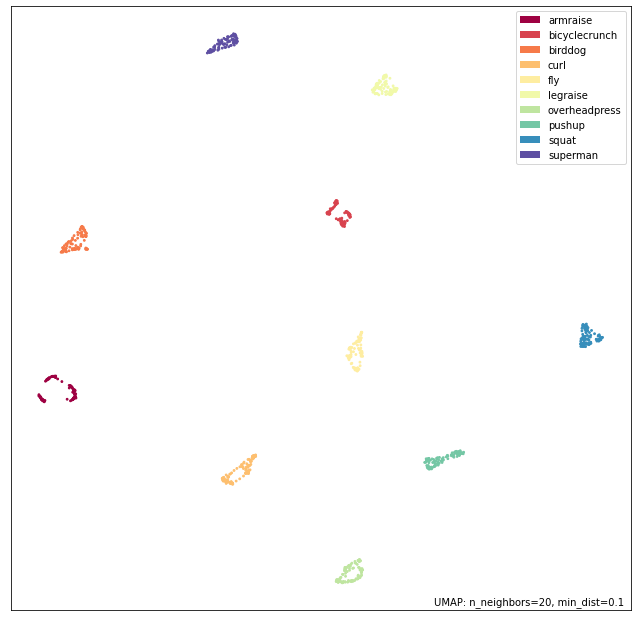

In [ ]:
Plot_umap(x,y,n_neighbors=20)


(70000, 784)

(788,)

In [ ]:

data, labels = X_train,y_train
encoder = LabelEncoder()
encoder.fit(labels)
encoded_Y = encoder.transform(y_train)
dummy_y = np_utils.to_categorical(encoded_Y)
labels=np.argmax(dummy_y,axis=1)
# labels = np.asarray(labels, dtype=np.int32)
n_neighbors=[5,25,125,250]
# Now we compute the embeddings for the grid of parameters
min_dists = [0, 0.2, 0.5, 0.9]
normal_embeddings = np.zeros((4, 4, X_train.shape[0], 2))
precomputed_knn_embeddings = np.zeros((4, 4, X_train.shape[0], 2))

In [ ]:
for i, k in enumerate(n_neighbors):
    for j, dist in enumerate(min_dists):
        normal_embeddings[i, j] = umap.UMAP(n_neighbors=k,
                                            min_dist=dist,
                                           ).fit_transform(data)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:

for i, k in enumerate(n_neighbors):
    mnist_knn = nearest_neighbors(data,
                              n_neighbors=k,
                              metric="euclidean",
                              metric_kwds=None,
                              angular=False,
                              random_state=None,
                             )
    print(len(mnist_knn))
    for j, dist in enumerate(min_dists):
        precomputed_knn_embeddings[i, j] = umap.UMAP(n_neighbors=k,
                                                      min_dist=dist,
                                                      precomputed_knn=mnist_knn,
                                                      ).fit_transform(data)

3


/usr/local/lib/python3.8/dist-packages/umap/umap_.py:1956: UserWarning: precomputed_knn is meant for large datasets. Since your data is small, precomputed_knn will be ignored and the k-nn will be computed normally.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/umap/umap_.py:1956: UserWarning: precomputed_knn is meant for large datasets. Since your data is small, precomputed_knn will be ignored and the k-nn will be computed normally.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/umap/umap_.py:1956: UserWarning: precomputed_knn is meant for large datasets. Since your data is small, precomputed_knn will be ignored a

3


/usr/local/lib/python3.8/dist-packages/umap/umap_.py:1956: UserWarning: precomputed_knn is meant for large datasets. Since your data is small, precomputed_knn will be ignored and the k-nn will be computed normally.
  warn(
/usr/local/lib/python3.8/dist-packages/umap/umap_.py:1956: UserWarning: precomputed_knn is meant for large datasets. Since your data is small, precomputed_knn will be ignored and the k-nn will be computed normally.
  warn(
/usr/local/lib/python3.8/dist-packages/umap/umap_.py:1956: UserWarning: precomputed_knn is meant for large datasets. Since your data is small, precomputed_knn will be ignored and the k-nn will be computed normally.
  warn(
/usr/local/lib/python3.8/dist-packages/umap/umap_.py:1956: UserWarning: precomputed_knn is meant for large datasets. Since your data is small, precomputed_knn will be ignored and the k-nn will be computed normally.
  warn(


3


/usr/local/lib/python3.8/dist-packages/umap/umap_.py:1956: UserWarning: precomputed_knn is meant for large datasets. Since your data is small, precomputed_knn will be ignored and the k-nn will be computed normally.
  warn(
/usr/local/lib/python3.8/dist-packages/umap/umap_.py:1956: UserWarning: precomputed_knn is meant for large datasets. Since your data is small, precomputed_knn will be ignored and the k-nn will be computed normally.
  warn(
/usr/local/lib/python3.8/dist-packages/umap/umap_.py:1956: UserWarning: precomputed_knn is meant for large datasets. Since your data is small, precomputed_knn will be ignored and the k-nn will be computed normally.
  warn(
/usr/local/lib/python3.8/dist-packages/umap/umap_.py:1956: UserWarning: precomputed_knn is meant for large datasets. Since your data is small, precomputed_knn will be ignored and the k-nn will be computed normally.
  warn(


3


/usr/local/lib/python3.8/dist-packages/umap/umap_.py:1956: UserWarning: precomputed_knn is meant for large datasets. Since your data is small, precomputed_knn will be ignored and the k-nn will be computed normally.
  warn(
/usr/local/lib/python3.8/dist-packages/umap/umap_.py:1956: UserWarning: precomputed_knn is meant for large datasets. Since your data is small, precomputed_knn will be ignored and the k-nn will be computed normally.
  warn(
/usr/local/lib/python3.8/dist-packages/umap/umap_.py:1956: UserWarning: precomputed_knn is meant for large datasets. Since your data is small, precomputed_knn will be ignored and the k-nn will be computed normally.
  warn(
/usr/local/lib/python3.8/dist-packages/umap/umap_.py:1956: UserWarning: precomputed_knn is meant for large datasets. Since your data is small, precomputed_knn will be ignored and the k-nn will be computed normally.
  warn(


In [ ]:
labels.shape

(788,)

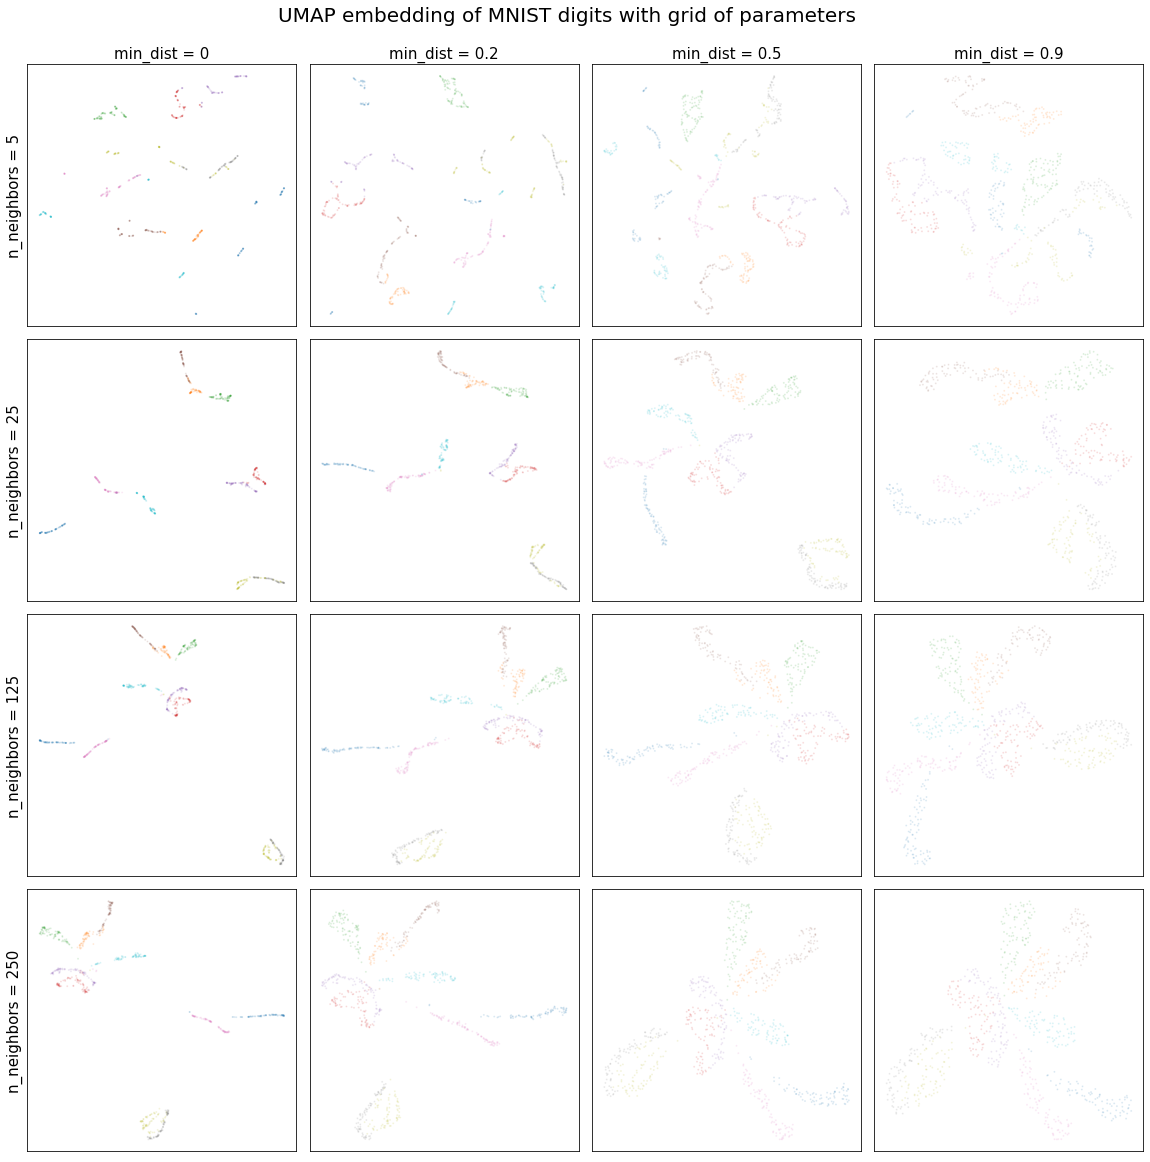

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        ax.scatter(normal_embeddings[i, j, :, 0],
                   normal_embeddings[i, j, :, 1],
                   c=labels,
                   cmap='tab10',
                   alpha=0.1,
                   s=1,
                   )
        ax.set_xticks([])
        ax.set_yticks([])
        if i == 0:
            ax.set_title("min_dist = {}".format(min_dists[j]), size=15)
        if j == 0:
            ax.set_ylabel("n_neighbors = {}".format(n_neighbors[i]), size=15)
fig.suptitle("UMAP embedding of MNIST digits with grid of parameters", y=0.92, size=20)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

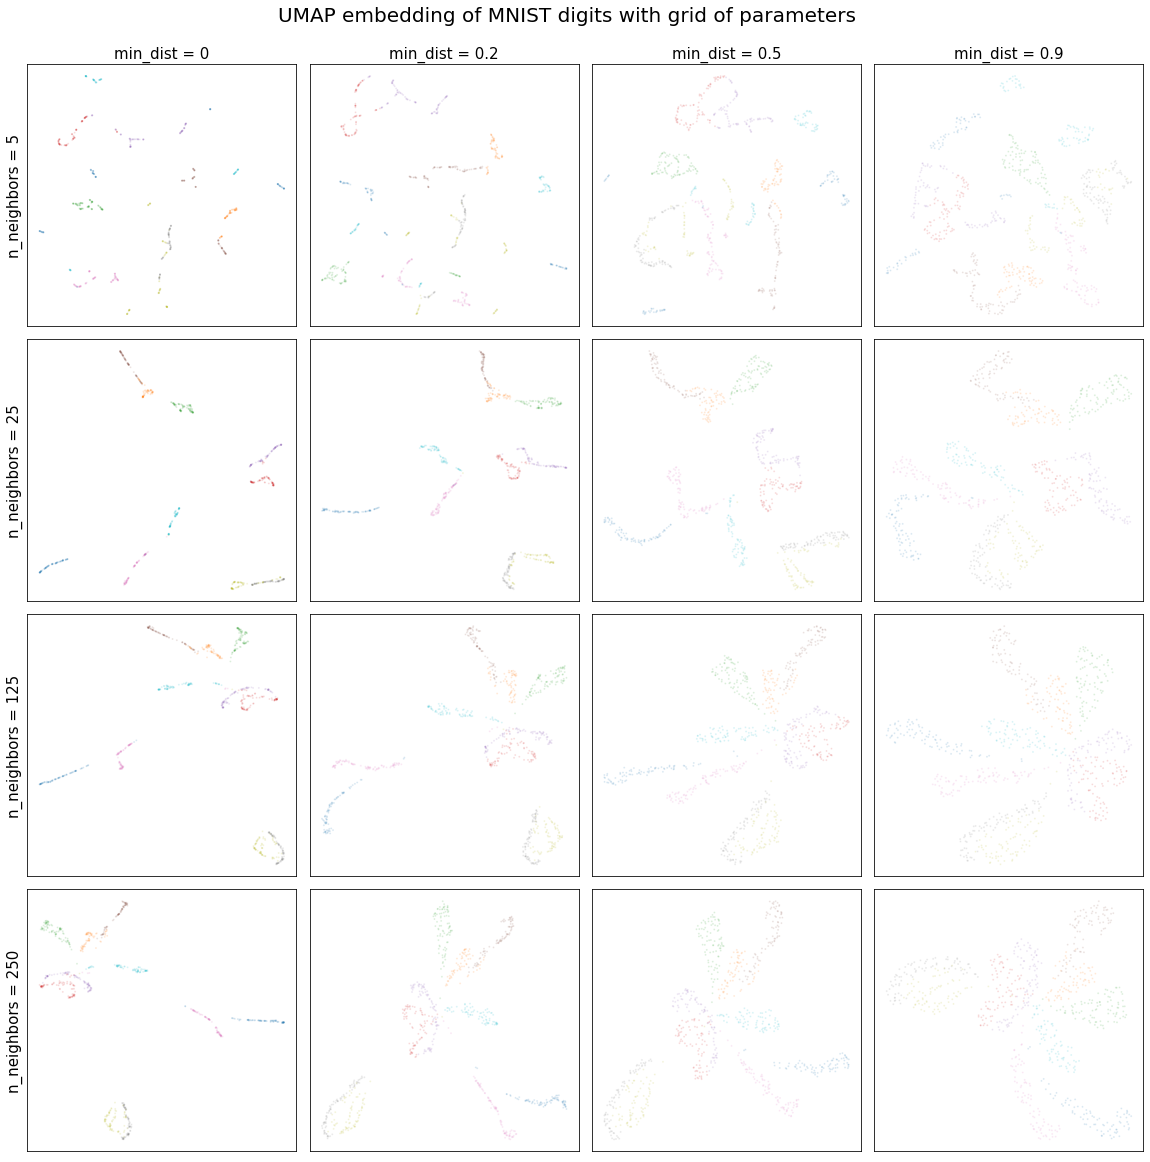

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        ax.scatter(precomputed_knn_embeddings[i, j, :, 0],
                   precomputed_knn_embeddings[i, j, :, 1],
                   c=labels,
                   cmap='tab10',
                   alpha=0.1,
                   s=1,
                   )
        ax.set_xticks([])
        ax.set_yticks([])
        if i == 0:
            ax.set_title("min_dist = {}".format(min_dists[j]), size=15)
        if j == 0:
            ax.set_ylabel("n_neighbors = {}".format(n_neighbors[i]), size=15)
fig.suptitle("UMAP embedding of MNIST digits with grid of parameters", y=0.92, size=20)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 5 5 5 5 5 5 5 5 

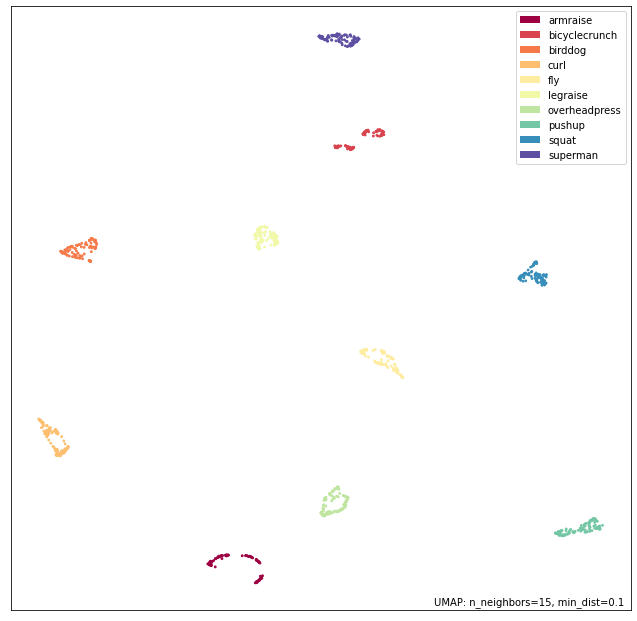

# KNN For Individual Data


In [ ]:
def Dession_tree(X_train,y_train,X_test,y_test):


  dession_clf = DecisionTreeClassifier()

  # Train Decision Tree Classifer
  dession_clf = dession_clf.fit(X_train,y_train)

  #Predict the response for test dataset
  dession_y_pred = dession_clf.predict(X_test)
  cf_matrix = confusion_matrix(y_test, dession_y_pred)
  plt.figure(figsize=(15,10))
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

  ax.set_xlabel('\nPredicted Category')
  ax.set_ylabel('Actual Category ');
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

      ## Display the visualization of the Confusion Matrix.
  plt.show()
  metrics.accuracy_score(y_test, dession_y_pred)

In [ ]:
pd_all_data=pd.DataFrame()
s={}
label_array=np.array([])
for path_index in range(0,len(final_folders2)):
#     path_index=0
    path=join(finalPath,final_folders2[path_index])
    print(path_index)
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f)) and f.endswith('.json')]
    for file_index in range(0,30):
                f = open(join(path,onlyfiles[file_index]))
                data = json.load(f)
                for i in range(0,len(data['reps'])):
#                     print(data['reps'][i]['pixels'].keys())
                    for key in data['reps'][i]['pixels']:
#                             print(key)
                            if(not(key in s)):
                                s[key]=[]
                            s[key].append(data['reps'][i]['pixels'][key])
                    label_array=np.append(label_array,data['reps'][i]['label'])

                   
                
pd_all_data = pd.DataFrame.from_dict(s)

# pd_all_data=pd_all_data.transpose()

pd_all_data               

In [ ]:
pd_all_data['label']=np.array(label_array)
pd_data=pd_all_data
pd_data

In [ ]:
y=pd_data['label']
x=pd_data.drop(labels=['label'],axis=1)

In [ ]:
!pip install dtaidistance

from dtaidistance.dtw_visualisation import plot_warp,plot_warpingpaths
from dtaidistance import dtw

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
def dtw_distance(s1,s2):
    d2, paths = dtw.warping_paths(np.array(s1), np.array(s2), window=2)
#     best_path = dtw.best_path(paths)
    return d2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=15)


In [ ]:
def distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += dtw_distance(row1[i], row2[i])
    return (distance)

In [ ]:
def predict_knn(X_train,y_train, X,n_neighbors):
        
        # initialize prediction_knn as empty list
        prediction_knn = []

        # # initialize euclidian_distances as empty list
        # euclidian_distances = []

        for test_row_index,test in X.iterrows():  # Main loop iterating through len(X)
            print(test_row_index)
            # initialize euclidian_distances as empty list
            distances = []
            train_row_indexs=[]
            for train_row_index,train in X_train.iterrows():
#                 print(test,row)
                # for every row in X_train, find eucl_distance to X using
                # euclidean_distance() and append to euclidian_distances list
                dist = distance(train,test)
                distances.append(dist)
                train_row_indexs.append(train_row_index)
            # sort euclidian_distances in ascending order, and retain only k
            # neighbors as specified in n_neighbors (n_neighbors = k)
            neighbors = np.array(distances).argsort()[: n_neighbors]
#             print(neighbors,distances)
            # initialize dict to count class occurrences in y_train
            count_neighbors = {}

            for val in neighbors:
#                 print(val)
                if y_train[train_row_indexs[val]] in count_neighbors:
                    count_neighbors[y_train[train_row_indexs[val]]] += 1
                else:
                    count_neighbors[y_train[train_row_indexs[val]]] = 1

            # max count labels to prediction_knn
            prediction_knn.append(max(count_neighbors, key=count_neighbors.get))

        return prediction_knn

In [ ]:
prediction = predict_knn(X_train,y_train, X_test, 3)
print(prediction)

In [ ]:
prediction